### Generate Data-based Figures and Diagrams for PeerJ Paper

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from modules import prepared_data

# controls
save_figs = True
plt.rcParams['figure.dpi'] = 500

In [2]:
FSL_dataset = np.load(f'FSL_alphabet_landmarks_24classes.npy', allow_pickle=True).item()
num_data = len(FSL_dataset['target'])
print(f'{num_data} data points collected. Each datapoint represents the MediaPipe landmarks of the hand.')

10800 data points collected. Each datapoint represents the MediaPipe landmarks of the hand.


#### Frequency of Converted Images into Landmarks

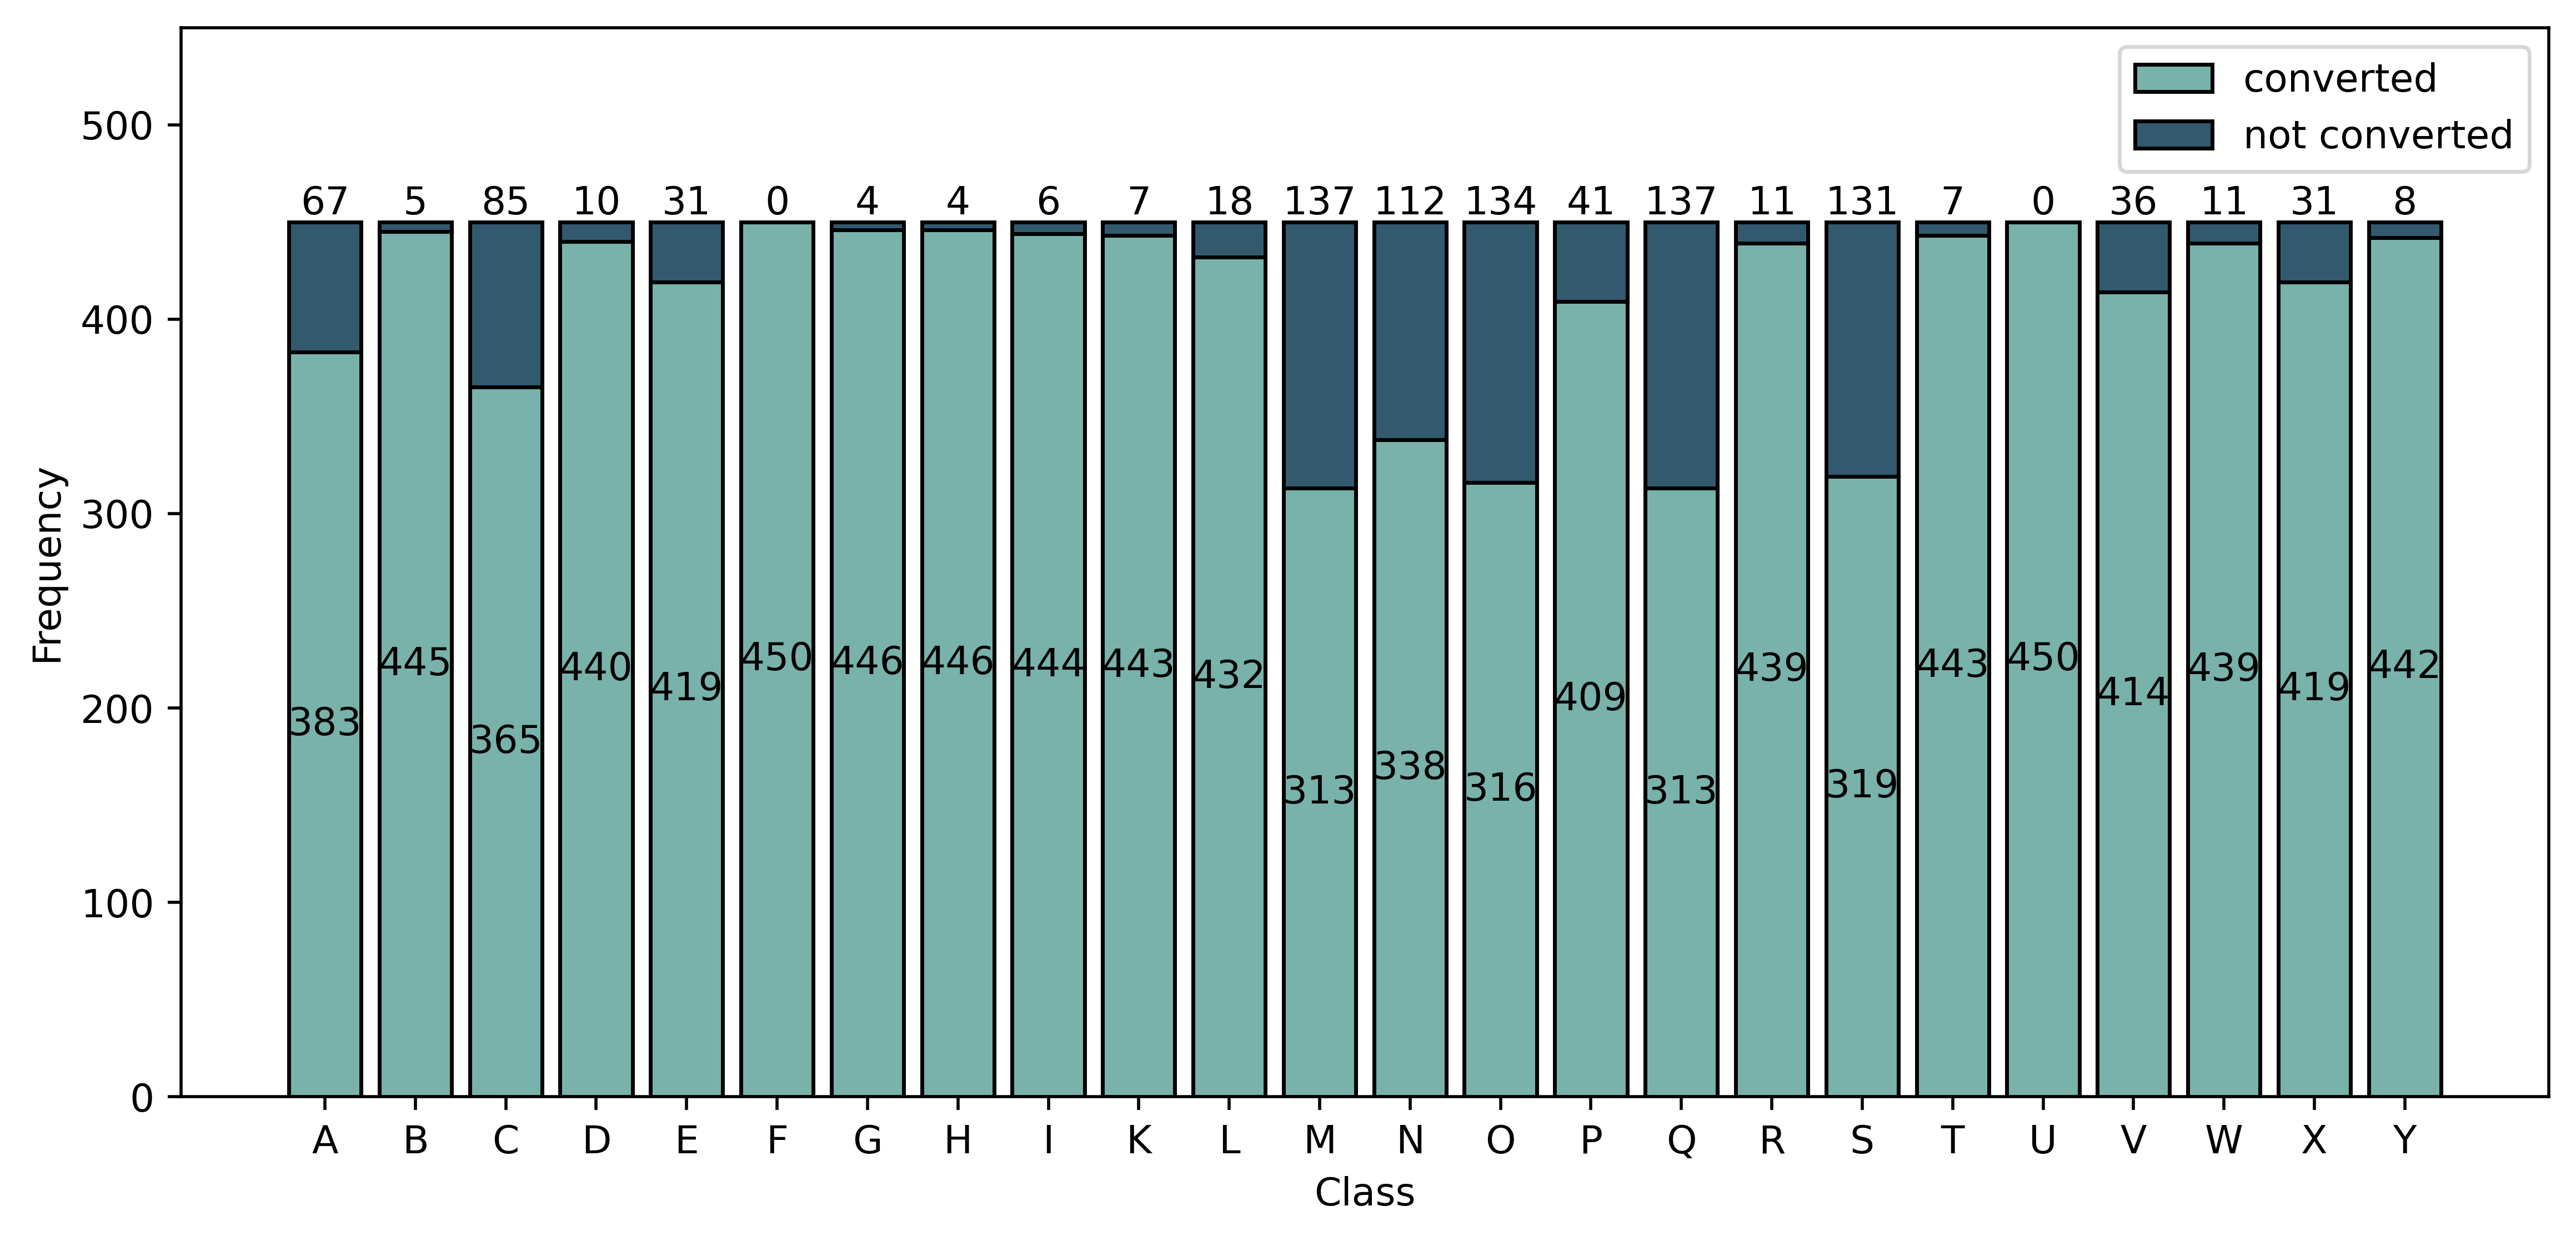

In [3]:
# indices of None values
none_idx = np.array([idx for idx,data in enumerate(FSL_dataset['data']) if data is None])
none_targets = np.array(FSL_dataset['target'])[none_idx]

# remark: All instances with class "F" and "U" have landmarks
unique, frequency = np.unique(none_targets, return_counts=True)
unique = np.insert(unique, [5, -4], ['F', 'U'])
frequency = np.insert(frequency, [5, -4], 0)

frequency = {"converted": np.full_like(frequency, 450) - frequency,
             "not converted": frequency}
colors = ["#78b2ab", "#33596f"]
labels = list(frequency.keys())
l_type = ["center", "edge"]
bottom = np.zeros_like(frequency["converted"])


plt.figure(figsize=(11, 5))
for idx, freq in enumerate(frequency.values()):
    b = plt.bar(np.arange(len(freq)), freq, color=colors[idx], edgecolor='k',
                bottom=bottom, tick_label=unique)
    plt.bar_label(b, labels=frequency[labels[idx]], label_type=l_type[idx])
    bottom += freq

plt.ylim([0, 550])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.legend(["converted", "not converted"], loc="upper right")
plt.savefig("figures/result_converted.png")
plt.show()

#### Scaled and Unscaled Dataset

In [4]:
# balanced dataset
X_bal, y_bal, paths_bal = prepared_data(FSL_dataset, balanced=True, random_state=21)
print(f"""Balanced dataset prepared.
        total num_instances                 : {X_bal.shape[0]}
        num_instances per class             : {X_bal.shape[0]/24:n}
        num_features                        : {X_bal.shape[1]}""")

Balanced dataset prepared.
        total num_instances                 : 7512
        num_instances per class             : 313
        num_features                        : 63


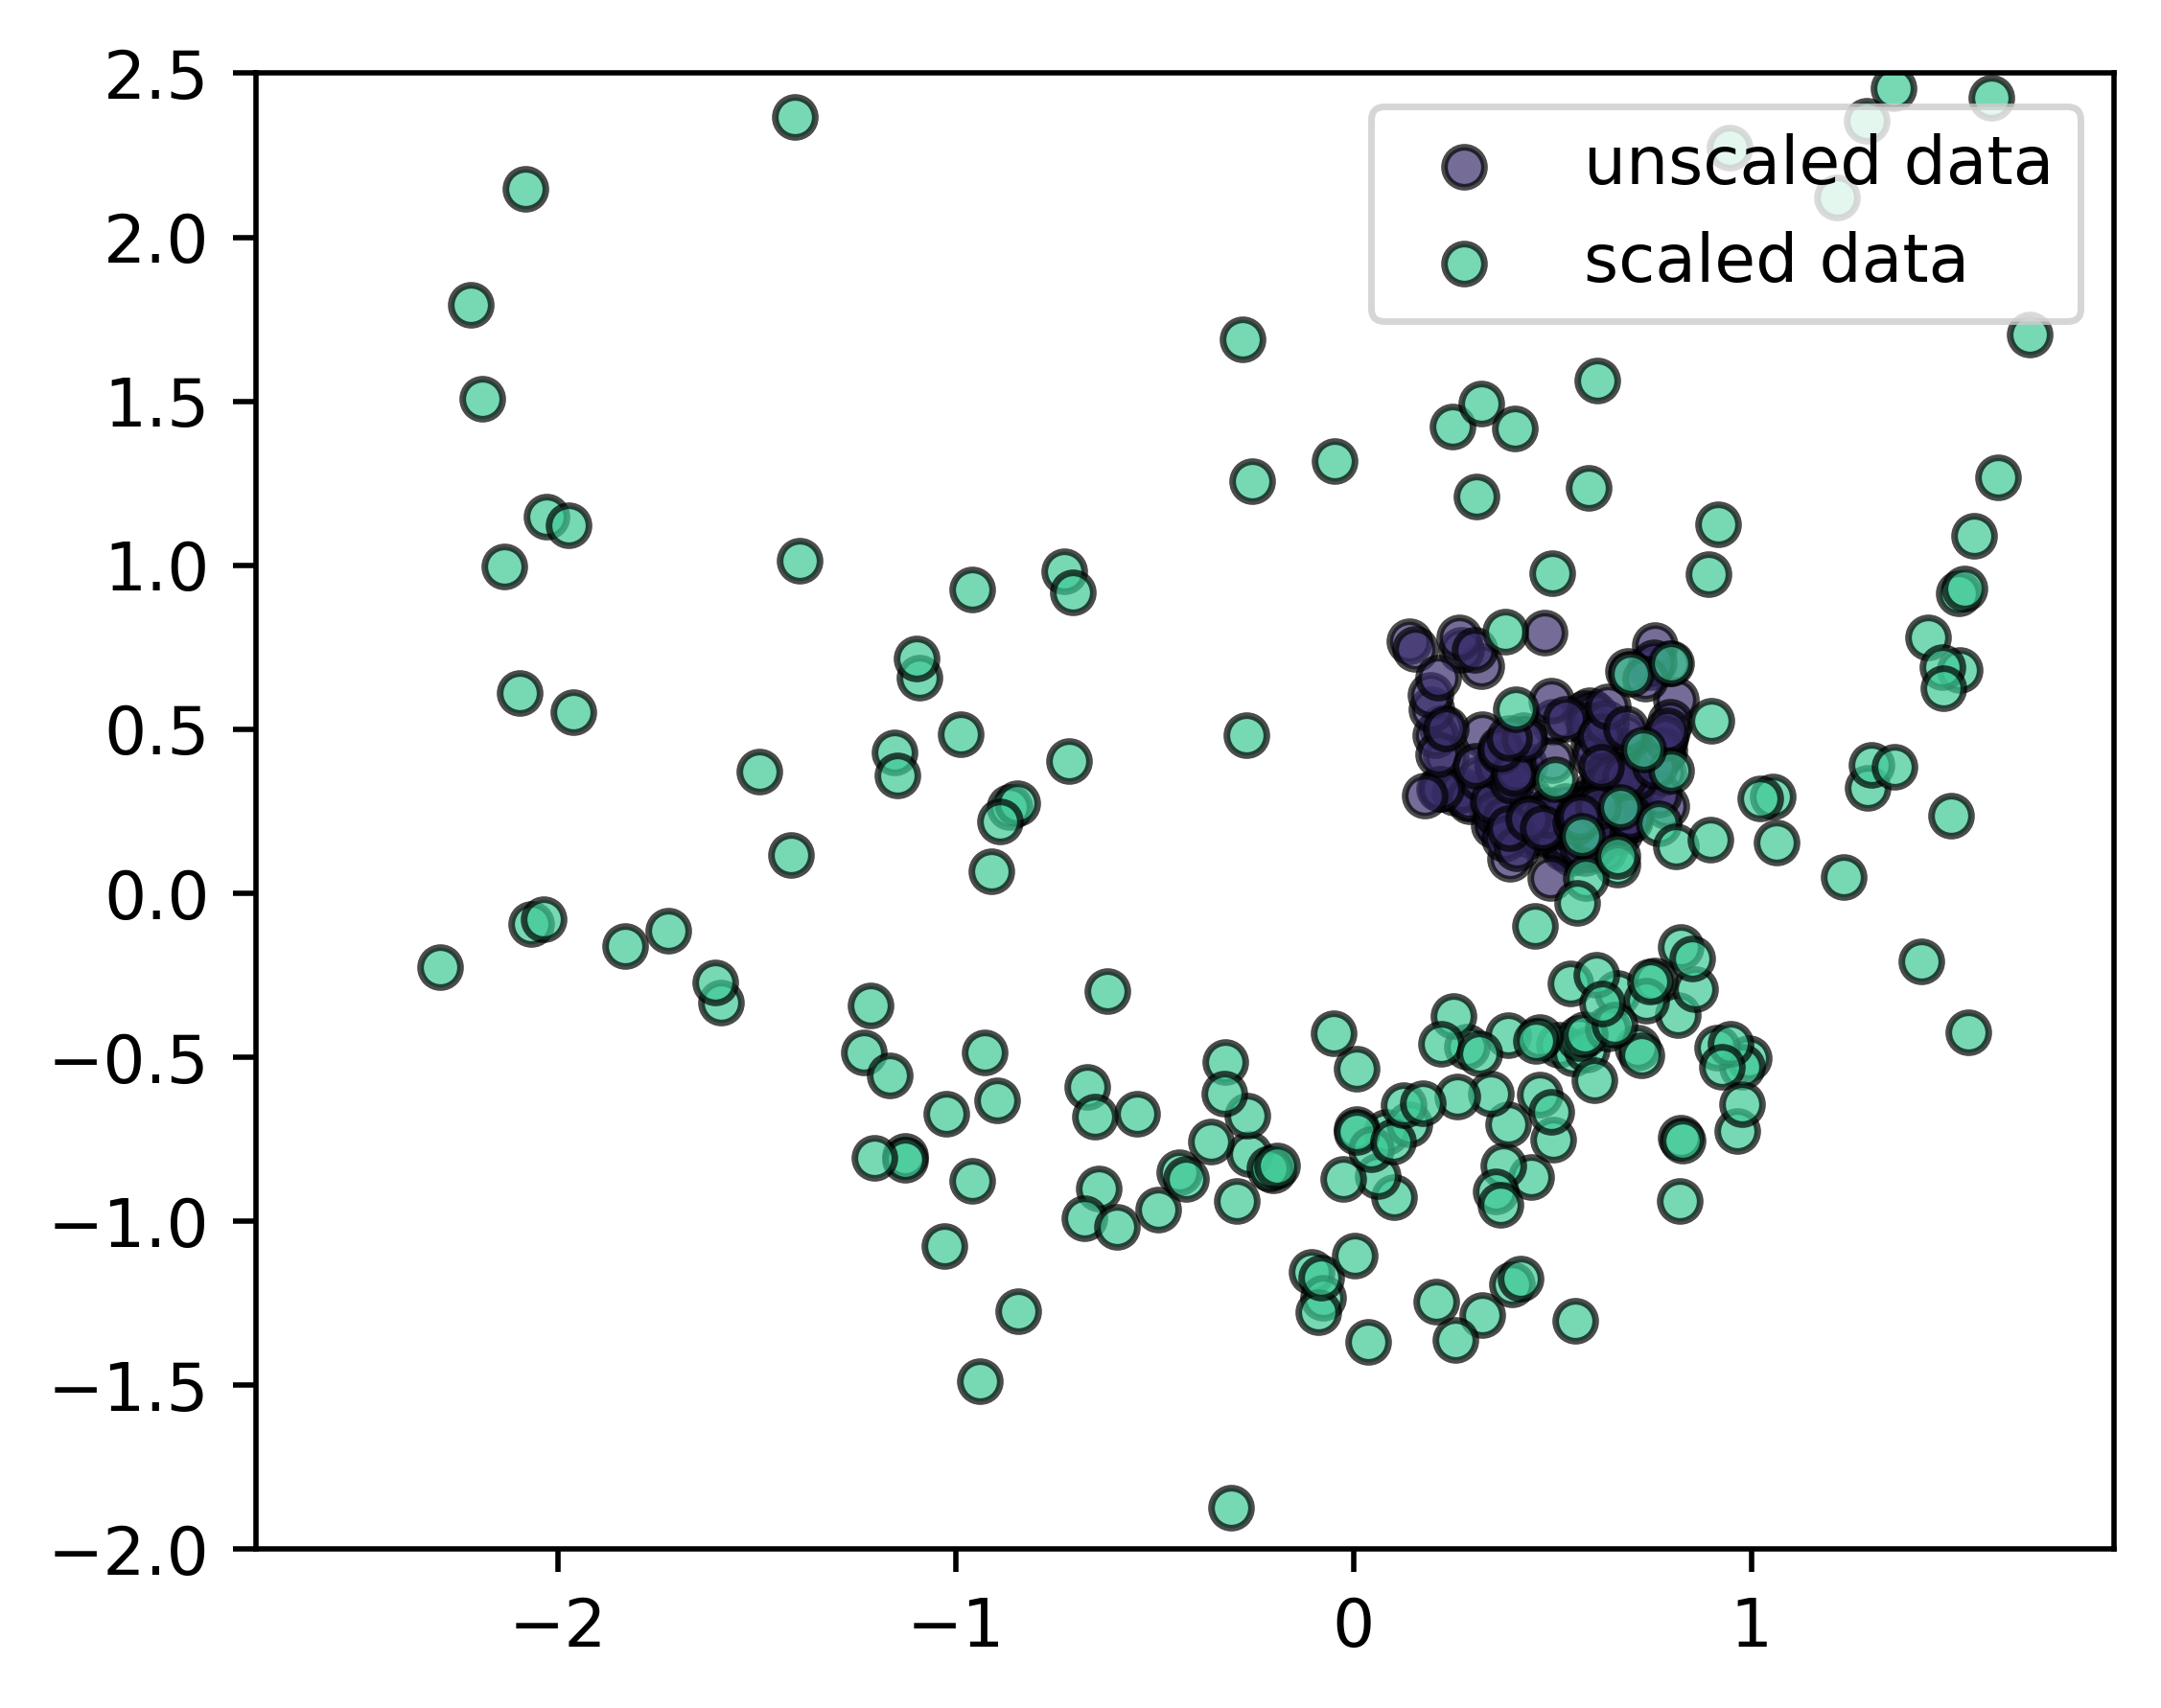

In [5]:
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.10, stratify=y_bal, random_state=21)
unscaled = X_train_bal.copy()
scaled = StandardScaler().fit_transform(unscaled)

n = 21  # feature index
num_pts = 200  # number of instances in plot
unscaled = unscaled[:num_pts, n:n+2]
scaled = scaled[:num_pts, n:n+2]

# plot aesthetics
alpha = 0.7
plt.rcParams['scatter.edgecolors'] = 'k'

# plotting points
fig = plt.figure(figsize=(5,4))
plt.scatter(unscaled[:,0], 
               unscaled[:,1], 
               alpha=alpha, c="#3a2f6b",
               label='unscaled data')
plt.scatter(scaled[:,0], 
               scaled[:,1], c="#3ec995", 
               alpha=alpha, label='scaled data')

plt.legend(loc="upper right")
plt.ylim([-2, 2.5])
if save_figs:
    plt.savefig('figures/scaled_unscaled_data.png')
plt.show()


#### Image and Landmarks

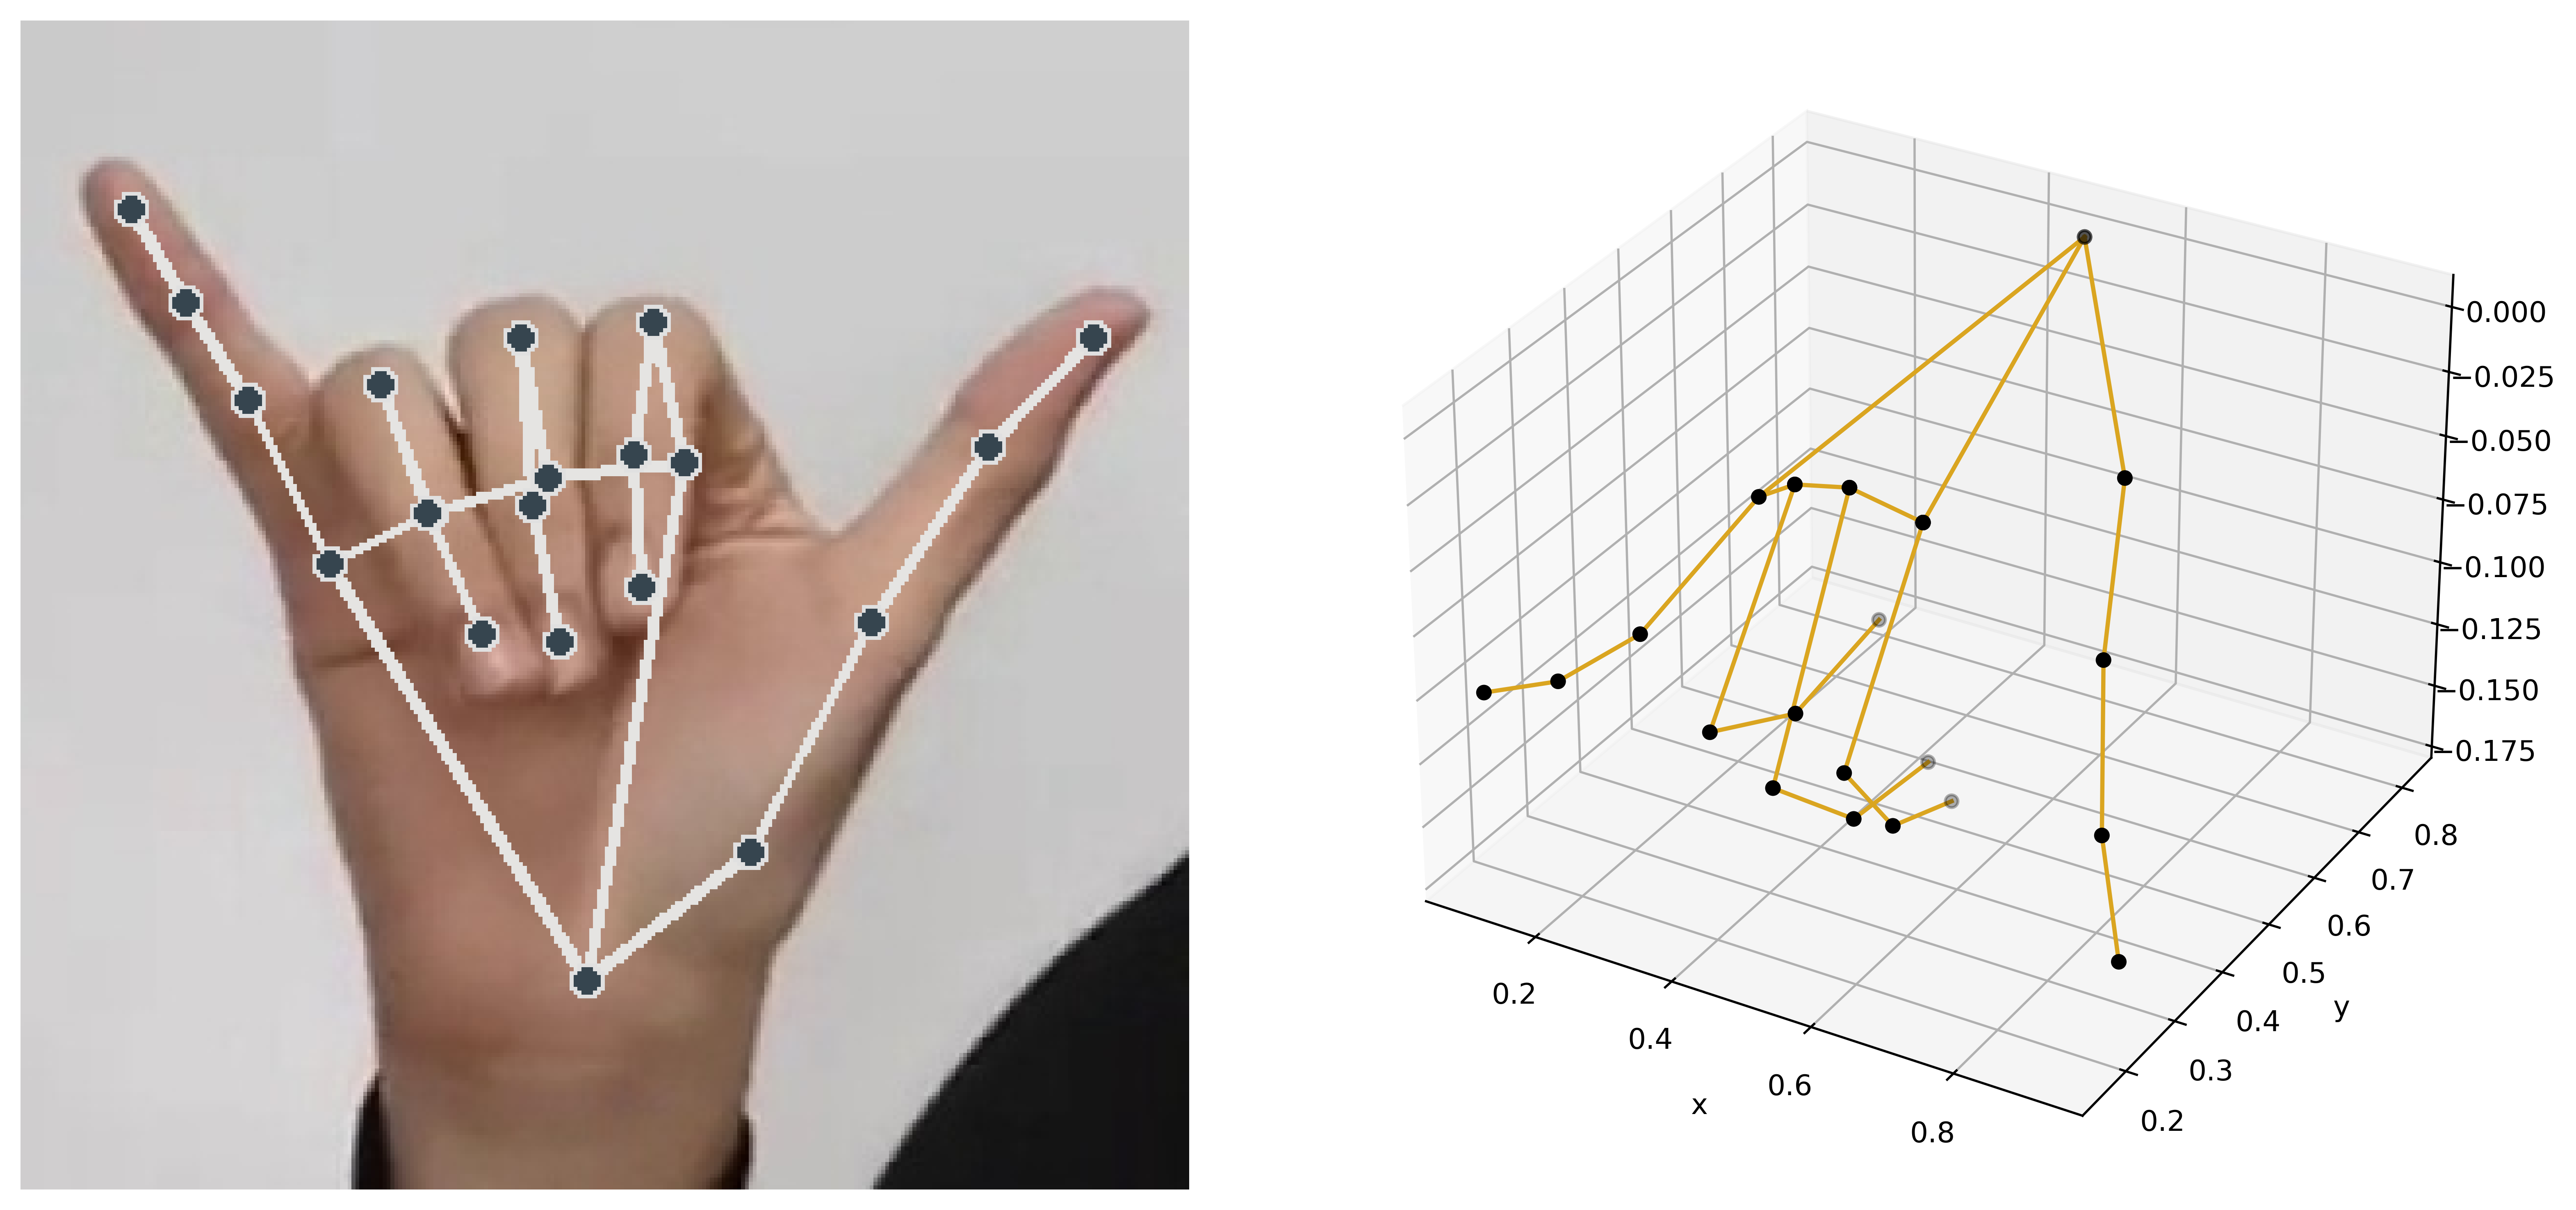

In [6]:
from modules import Image2Landmarks

img_path = 'FSL_images/Y/276.jpg'
img2landmarks = Image2Landmarks(flatten=True, display_image=True, display_landmarks=True, save_figs=True)
landmarks = img2landmarks.image_to_hand_landmarks(image_path=img_path, figure_size=(13, 6))

#### Main Results 

In [62]:
from modules import plot_boxplots, plot_bars
import matplotlib.pyplot as plt
import numpy as np

# plot controls
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['figure.dpi'] = 500

save_figs = False

predicted_labels_balanced = np.load("predicted_labels_balanced.npy", allow_pickle=True).item()
predicted_labels_imbalanced = np.load("predicted_labels_imbalanced.npy", allow_pickle=True).item()

print("Predicted labels are extracted.")

Predicted labels are extracted.


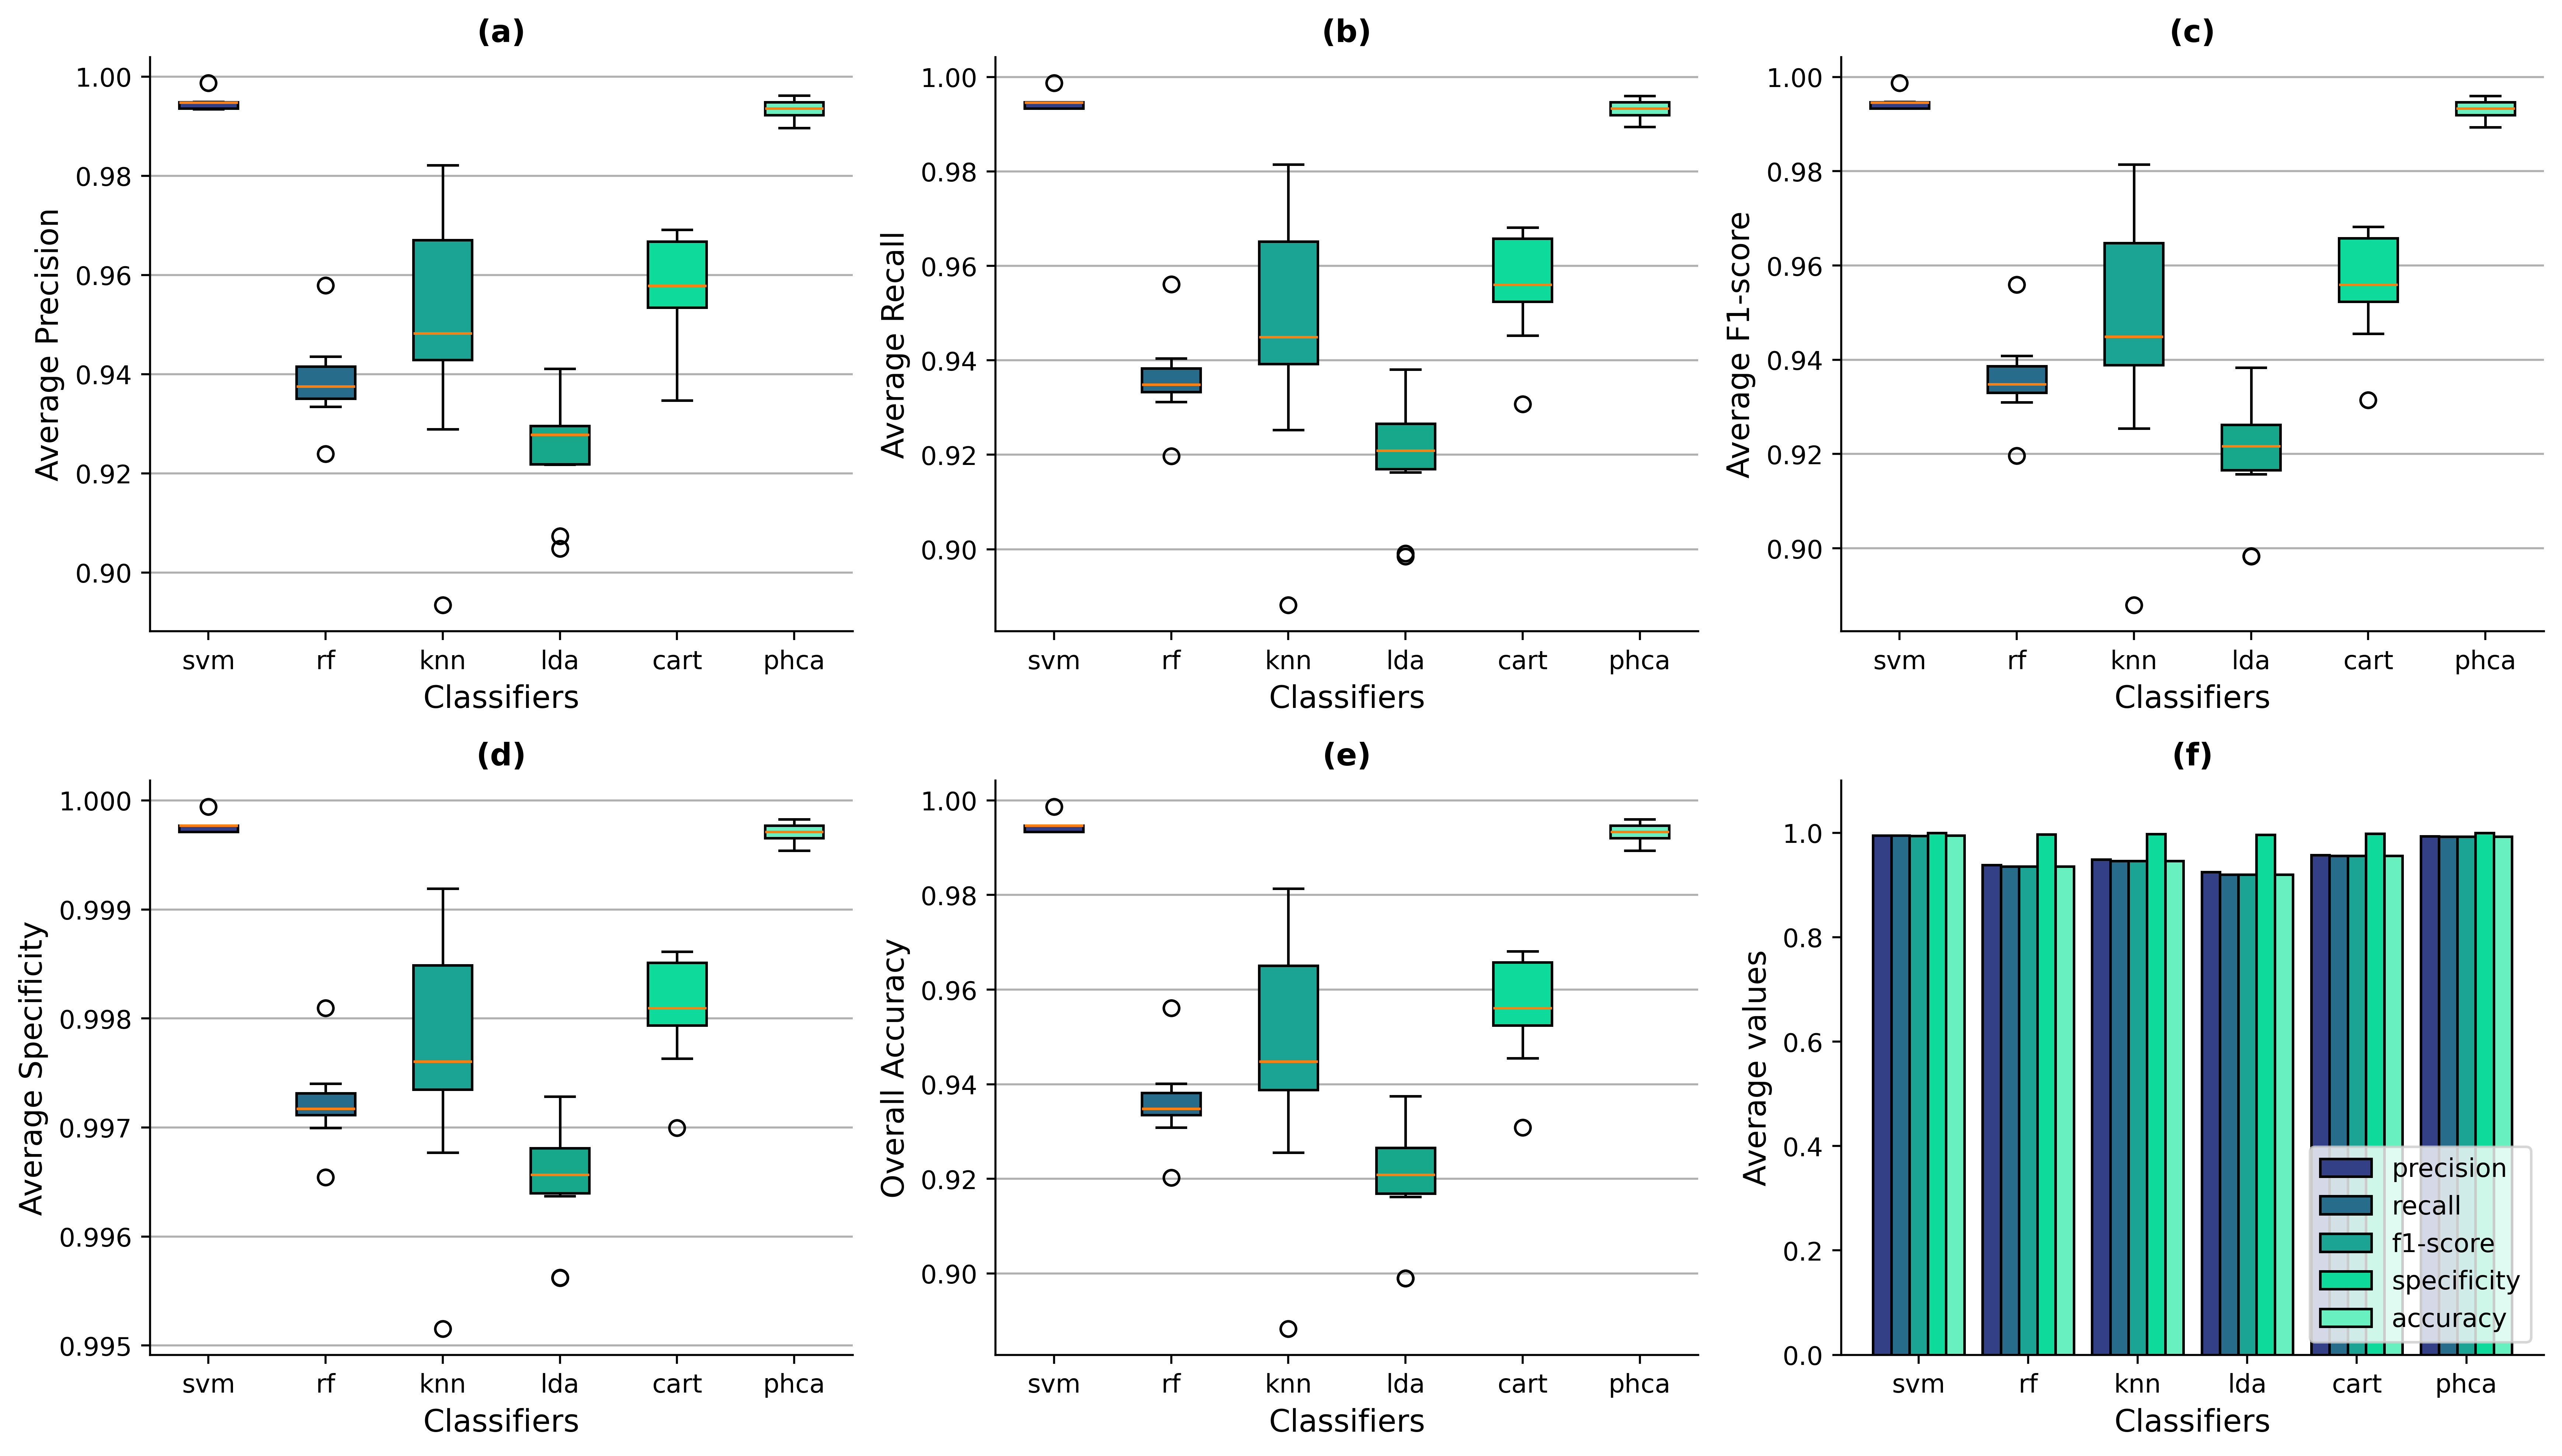

In [56]:
fig, axs = plt.subplots(2, 3, figsize=(14,8))
axs = axs.flatten()
metrics = ['precision', 'recall', 'f1-score', 'specificity', 'accuracy']
axs_label = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)"]

ave_scores = {met: [] for met in metrics}
overall_scores = {met: [] for met in metrics}

for idx in range(len(metrics)):
    scores = plot_boxplots(predicted_labels_balanced, metrics[idx], ax=axs[idx])
    axs[idx].set_title(axs_label[idx], weight='bold')
    
    overall_scores[metrics[idx]] = scores
    ave_scores[metrics[idx]] = scores.mean(axis=0)

plot_bars(ave_scores, metrics, ax=axs[-1])
axs[-1].set_title(axs_label[-1], weight='bold')

# plt.suptitle("Classification Result for Balanced Dataset", fontsize=15)
plt.tight_layout()
if save_figs:
    plt.savefig("figures/mainresult_balanced.png")
plt.show()

In [103]:
import pandas as pd

idx = 5
df = pd.DataFrame(overall_scores['specificity'][:,idx])
df.describe()

0
count  10.000000
mean    0.999721
std     0.000120
min     0.999512
25%     0.999656
50%     0.999712
75%     0.999779
max     0.999911

In [104]:
(0.002774+ 0.002561 + 0.002816 + 0.002748 + 0.000120) / 5

0.0022037999999999997

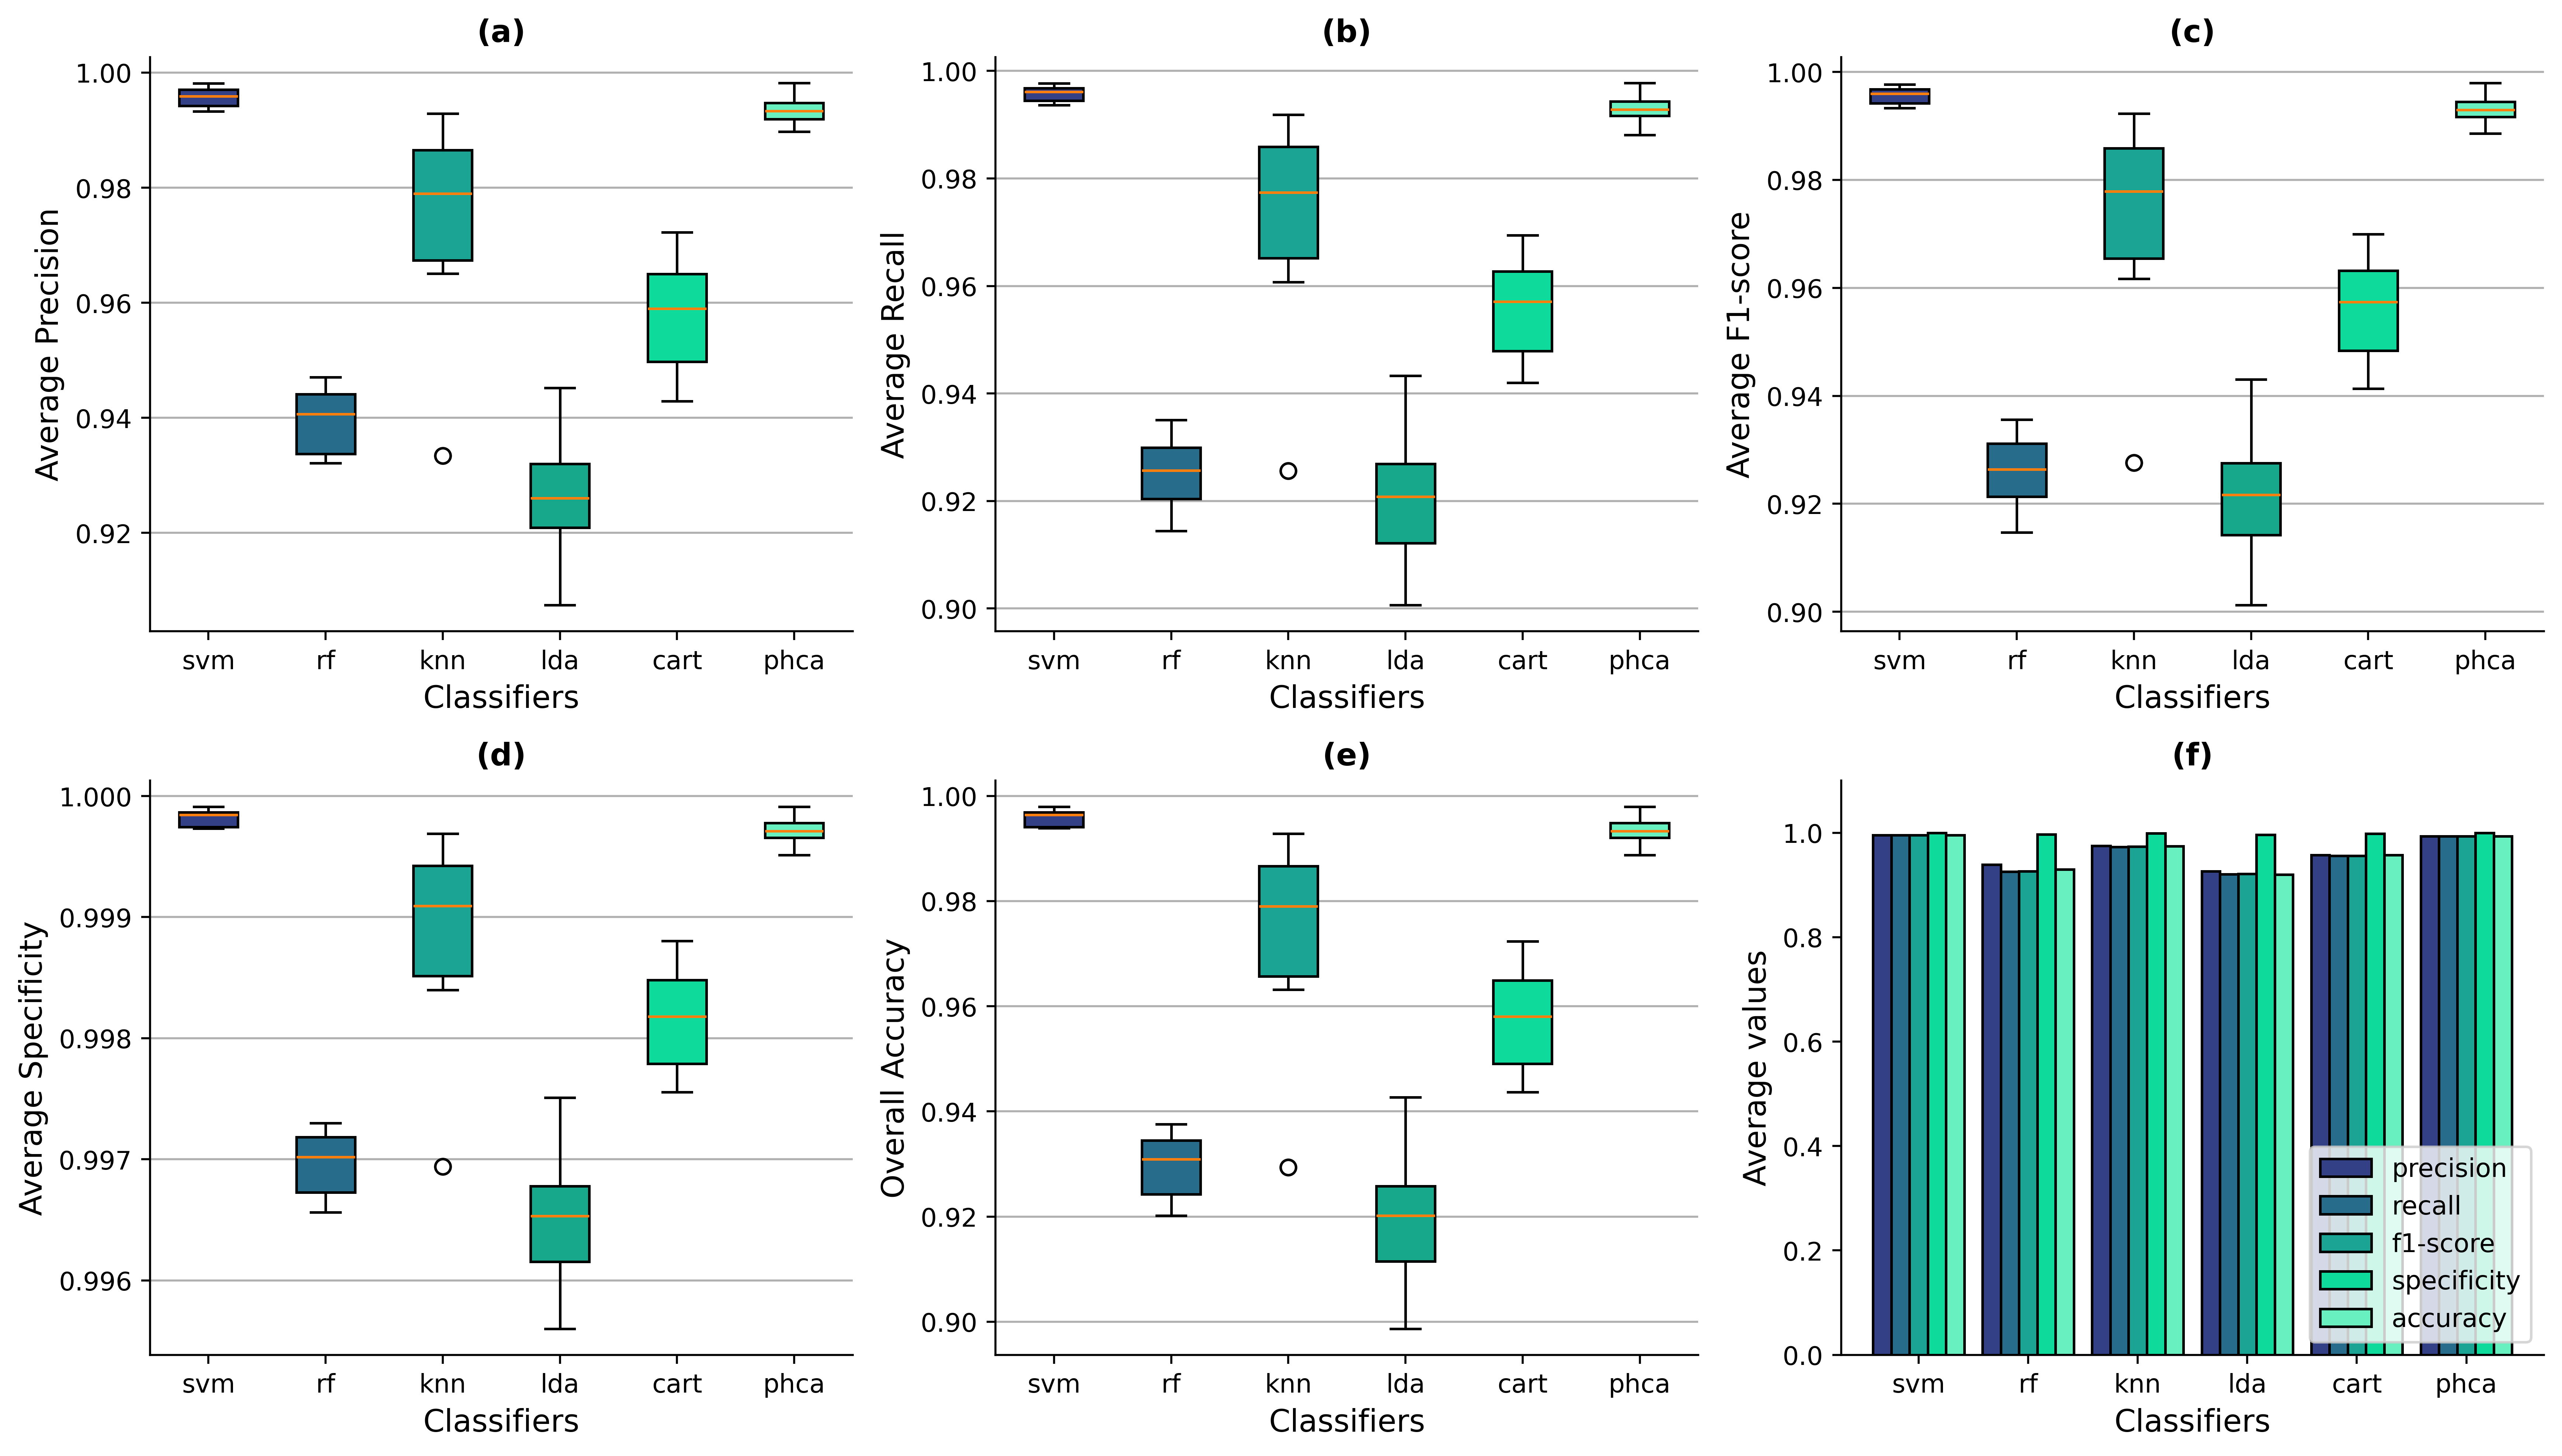

In [83]:
fig, axs = plt.subplots(2, 3, figsize=(14,8))
axs = axs.flatten()
metrics = ['precision', 'recall', 'f1-score', 'specificity', 'accuracy']
axs_label = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)"]

ave_scores = {met: [] for met in metrics}
overall_scores = {met: [] for met in metrics}

for idx in range(len(metrics)):
    scores = plot_boxplots(predicted_labels_imbalanced, metrics[idx], ax=axs[idx])
    axs[idx].set_title(axs_label[idx], weight='bold')
    
    overall_scores[metrics[idx]] = scores
    ave_scores[metrics[idx]] = scores.mean(axis=0)

plot_bars(ave_scores, metrics, ax=axs[-1])
axs[-1].set_title(axs_label[-1], weight='bold')

# plt.suptitle("Classification Result for Imbalanced Dataset", fontsize=15)
plt.tight_layout()
if save_figs:
    plt.savefig("figures/mainresult_imbalanced.png")
plt.show()

In [118]:
idx = 4
df = pd.DataFrame(overall_scores['specificity'][:,idx])
df.describe()

0
count  10.000000
mean    0.998144
std     0.000442
min     0.997556
25%     0.997789
50%     0.998179
75%     0.998481
max     0.998805

Text(0.5, 1.0, '(a)')

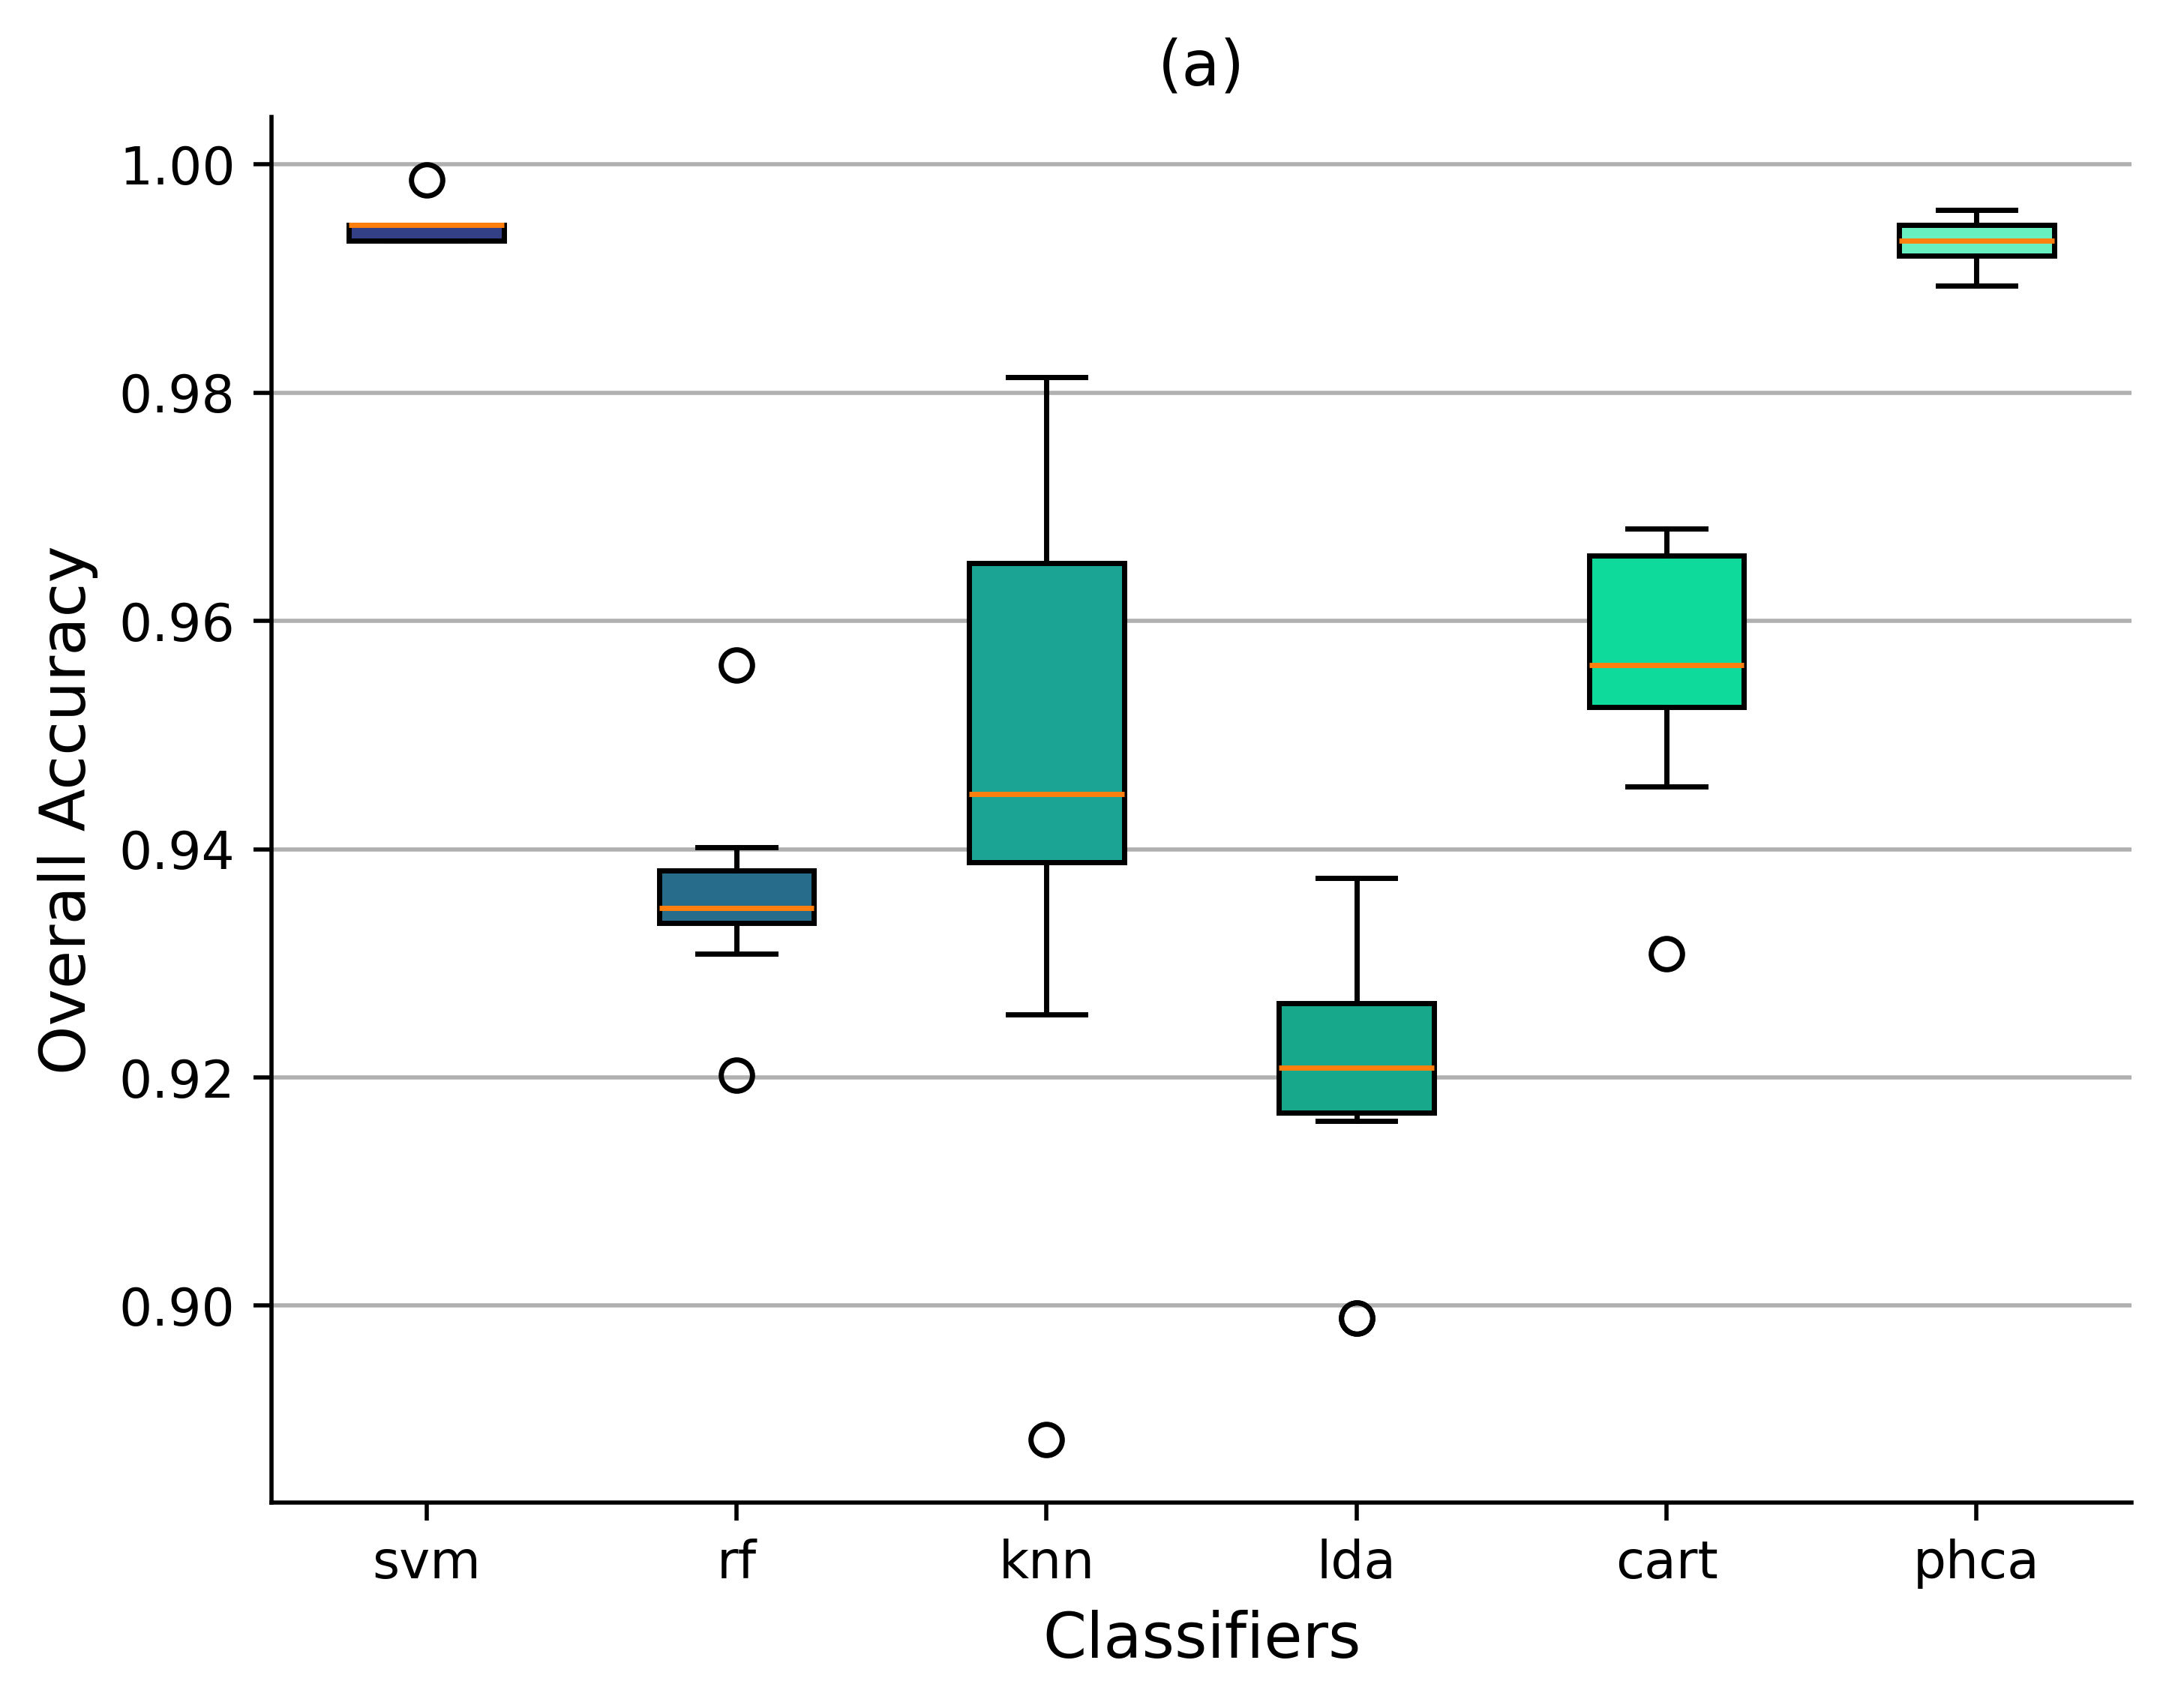

In [51]:
_ = plot_boxplots(predicted_labels_balanced, metric='accuracy')

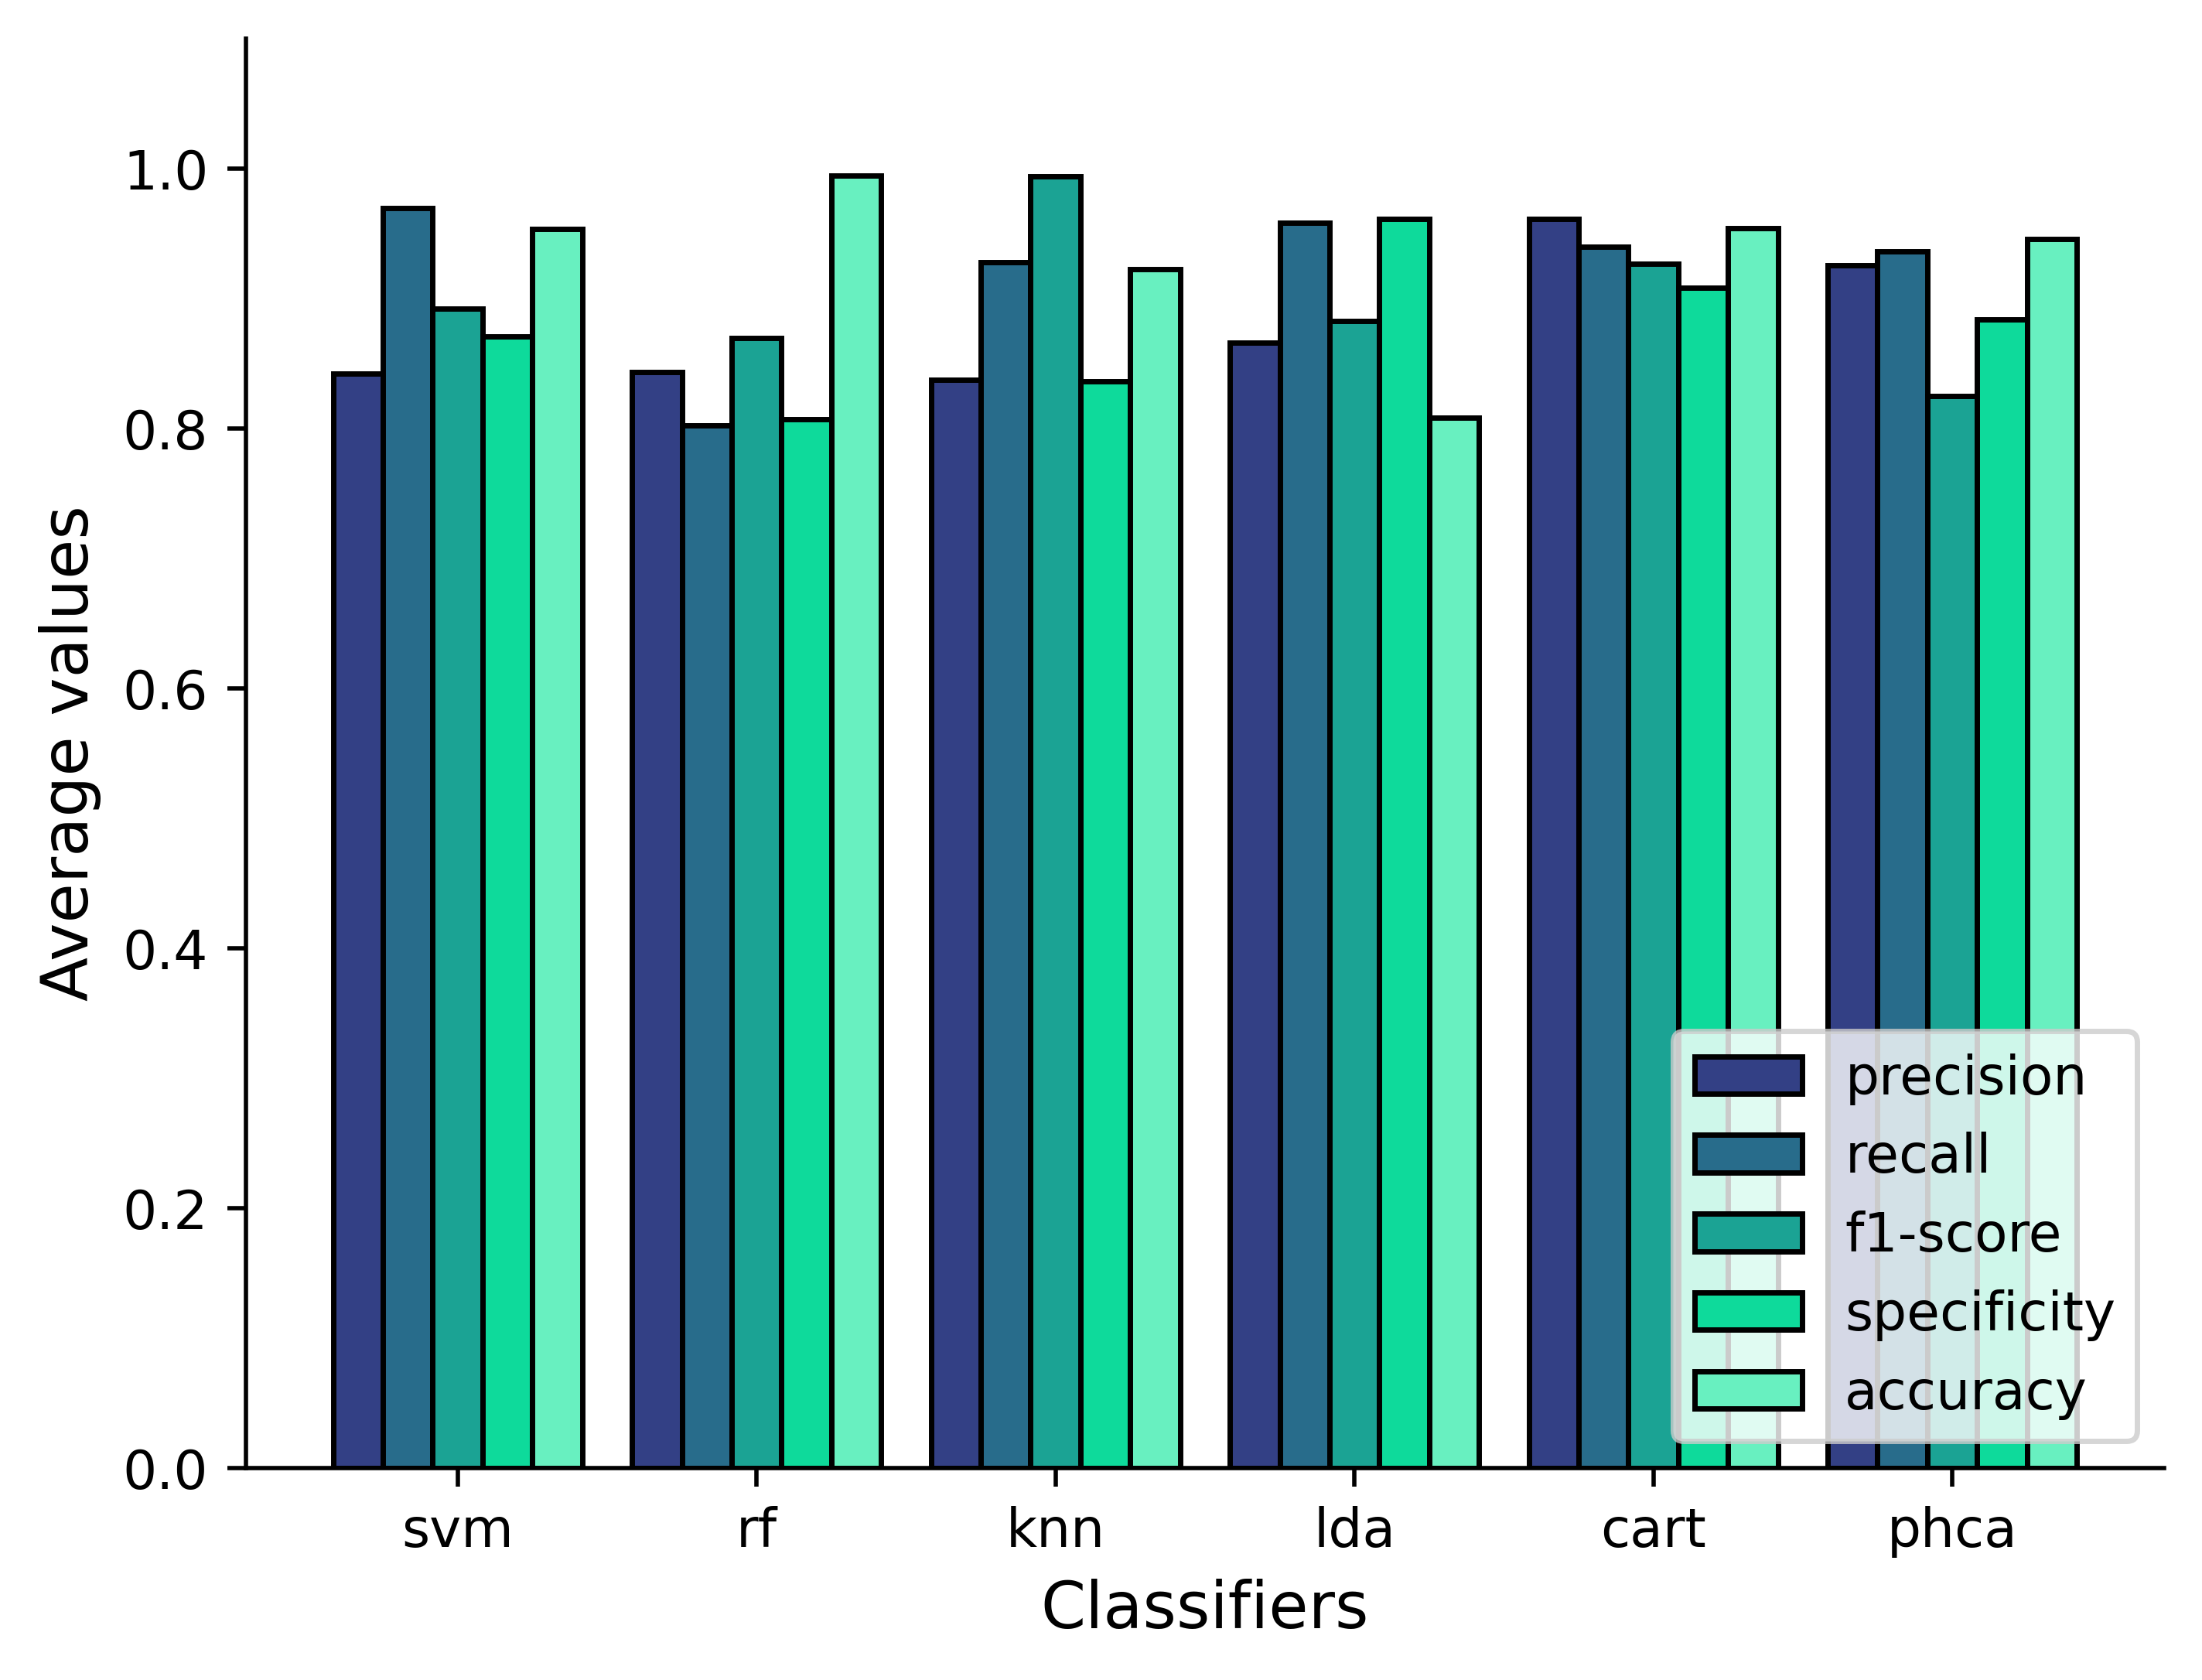

In [18]:
random_scores = {met: np.random.uniform(0.8, 1.0, size=6) for met in metrics}
plot_bars(random_scores, metrics)

#### Comparison of Evaluation Metrics

In [119]:
from modules import nemenyi_test

# plot controls
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 12

predicted_labels_balanced = np.load("predicted_labels_balanced.npy", allow_pickle=True).item()
predicted_labels_imbalanced = np.load("predicted_labels_imbalanced.npy", allow_pickle=True).item()

metrics = ['precision', 'recall', 'f1-score', 'specificity', 'accuracy']
print("Predicted labels are extracted.")

Predicted labels are extracted.


In [132]:
trial_idx = 0
_ = nemenyi_test(predicted_labels_balanced, trial_idx, metrics)

The p-value is: 4.2804424790612567e-29
At least one population mean differs from the others. 

           svm        rf       knn       lda      cart      phca
svm   1.000000  0.001000  0.001731  0.001000  0.001000  0.899439
rf    0.001000  1.000000  0.225773  0.464759  0.900000  0.001000
knn   0.001731  0.225773  1.000000  0.001000  0.184993  0.060387
lda   0.001000  0.464759  0.001000  1.000000  0.522633  0.001000
cart  0.001000  0.900000  0.184993  0.522633  1.000000  0.001000
phca  0.899439  0.001000  0.060387  0.001000  0.001000  1.000000


In [137]:
trial_idx = 0
_ = nemenyi_test(predicted_labels_imbalanced, trial_idx, metrics)

The p-value is: 4.699445300398246e-46
At least one population mean differs from the others. 

           svm     rf       knn    lda   cart      phca
svm   1.000000  0.001  0.032944  0.001  0.001  0.832942
rf    0.001000  1.000  0.001000  0.900  0.900  0.001000
knn   0.032944  0.001  1.000000  0.001  0.001  0.452656
lda   0.001000  0.900  0.001000  1.000  0.900  0.001000
cart  0.001000  0.900  0.001000  0.900  1.000  0.001000
phca  0.832942  0.001  0.452656  0.001  0.001  1.000000


#### Confusion Matrix of PHCA

In [4]:
from modules import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# plot controls
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['figure.dpi'] = 500

save_figs = True

predicted_labels_balanced = np.load("predicted_labels_balanced.npy", allow_pickle=True).item()
predicted_labels_imbalanced = np.load("predicted_labels_imbalanced.npy", allow_pickle=True).item()

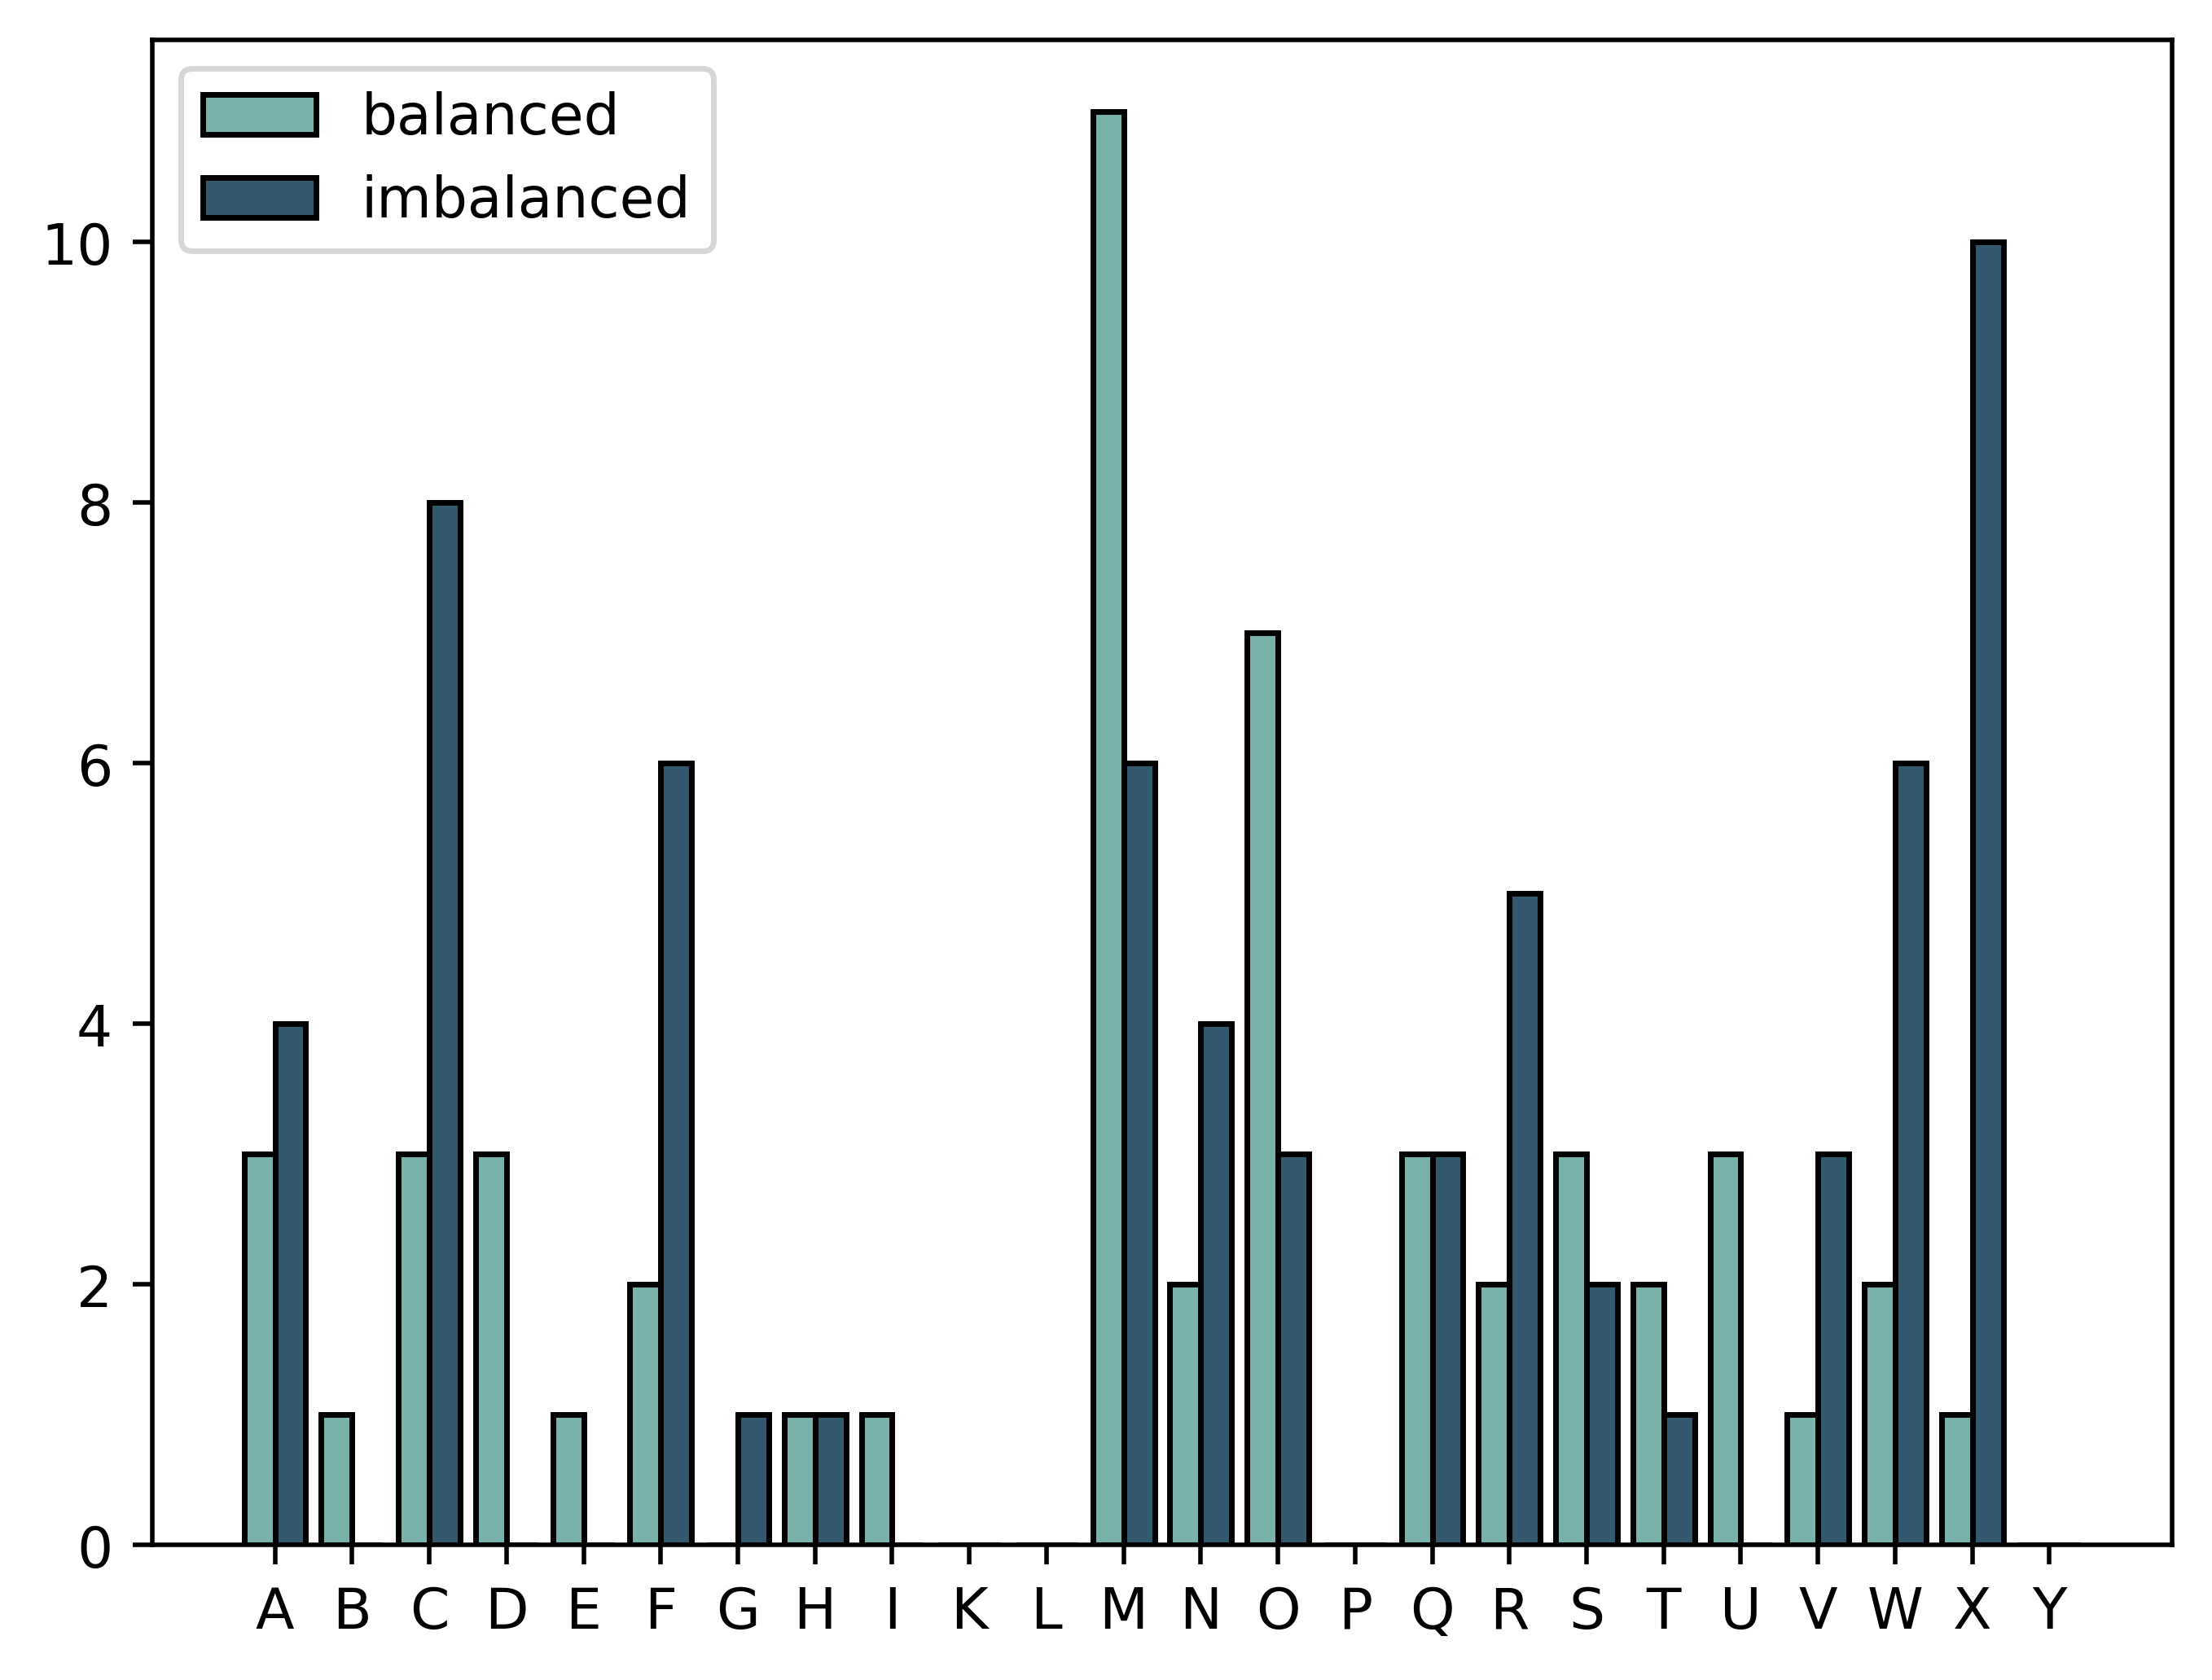

In [2]:
from sklearn.metrics import confusion_matrix

classes = np.unique(predicted_labels_balanced['true_labels'][0])
conf_mats_bal, conf_mats_imb = {}, {}
misclsf_bal, misclsf_imb = [], []
for i in range(10):
    conf_mats_bal[i] = confusion_matrix(predicted_labels_balanced['true_labels'][i], predicted_labels_balanced['phca'][i])
    misclsf_bal.append(np.sum(conf_mats_bal[i], axis=1) - np.diag(conf_mats_bal[i]))

    conf_mats_imb[i] = confusion_matrix(predicted_labels_imbalanced['true_labels'][i], predicted_labels_imbalanced['phca'][i])
    misclsf_imb.append(np.sum(conf_mats_imb[i], axis=1) - np.diag(conf_mats_imb[i]))

misclsf_bal = np.sum(misclsf_bal, axis=0)
misclsf_imb = np.sum(misclsf_imb, axis=0)

balanced_cf, imbalanced_cf = np.zeros((24,24)), np.zeros((24,24))
for i in range(10):
    balanced_cf = balanced_cf + conf_mats_bal[i]
    imbalanced_cf = imbalanced_cf + conf_mats_imb[i]

width = 0.40
shift = -1/2 * width
X = np.arange(len(misclsf_bal))
plt.bar(X+shift, misclsf_bal, width=width, 
        color="#78b2ab", edgecolor='k', label='balanced')
shift += width
plt.bar(X+shift, misclsf_imb, width=width, 
        color="#33596f", edgecolor='k', label='imbalanced')
plt.xticks(X, classes)
plt.legend()
plt.show()

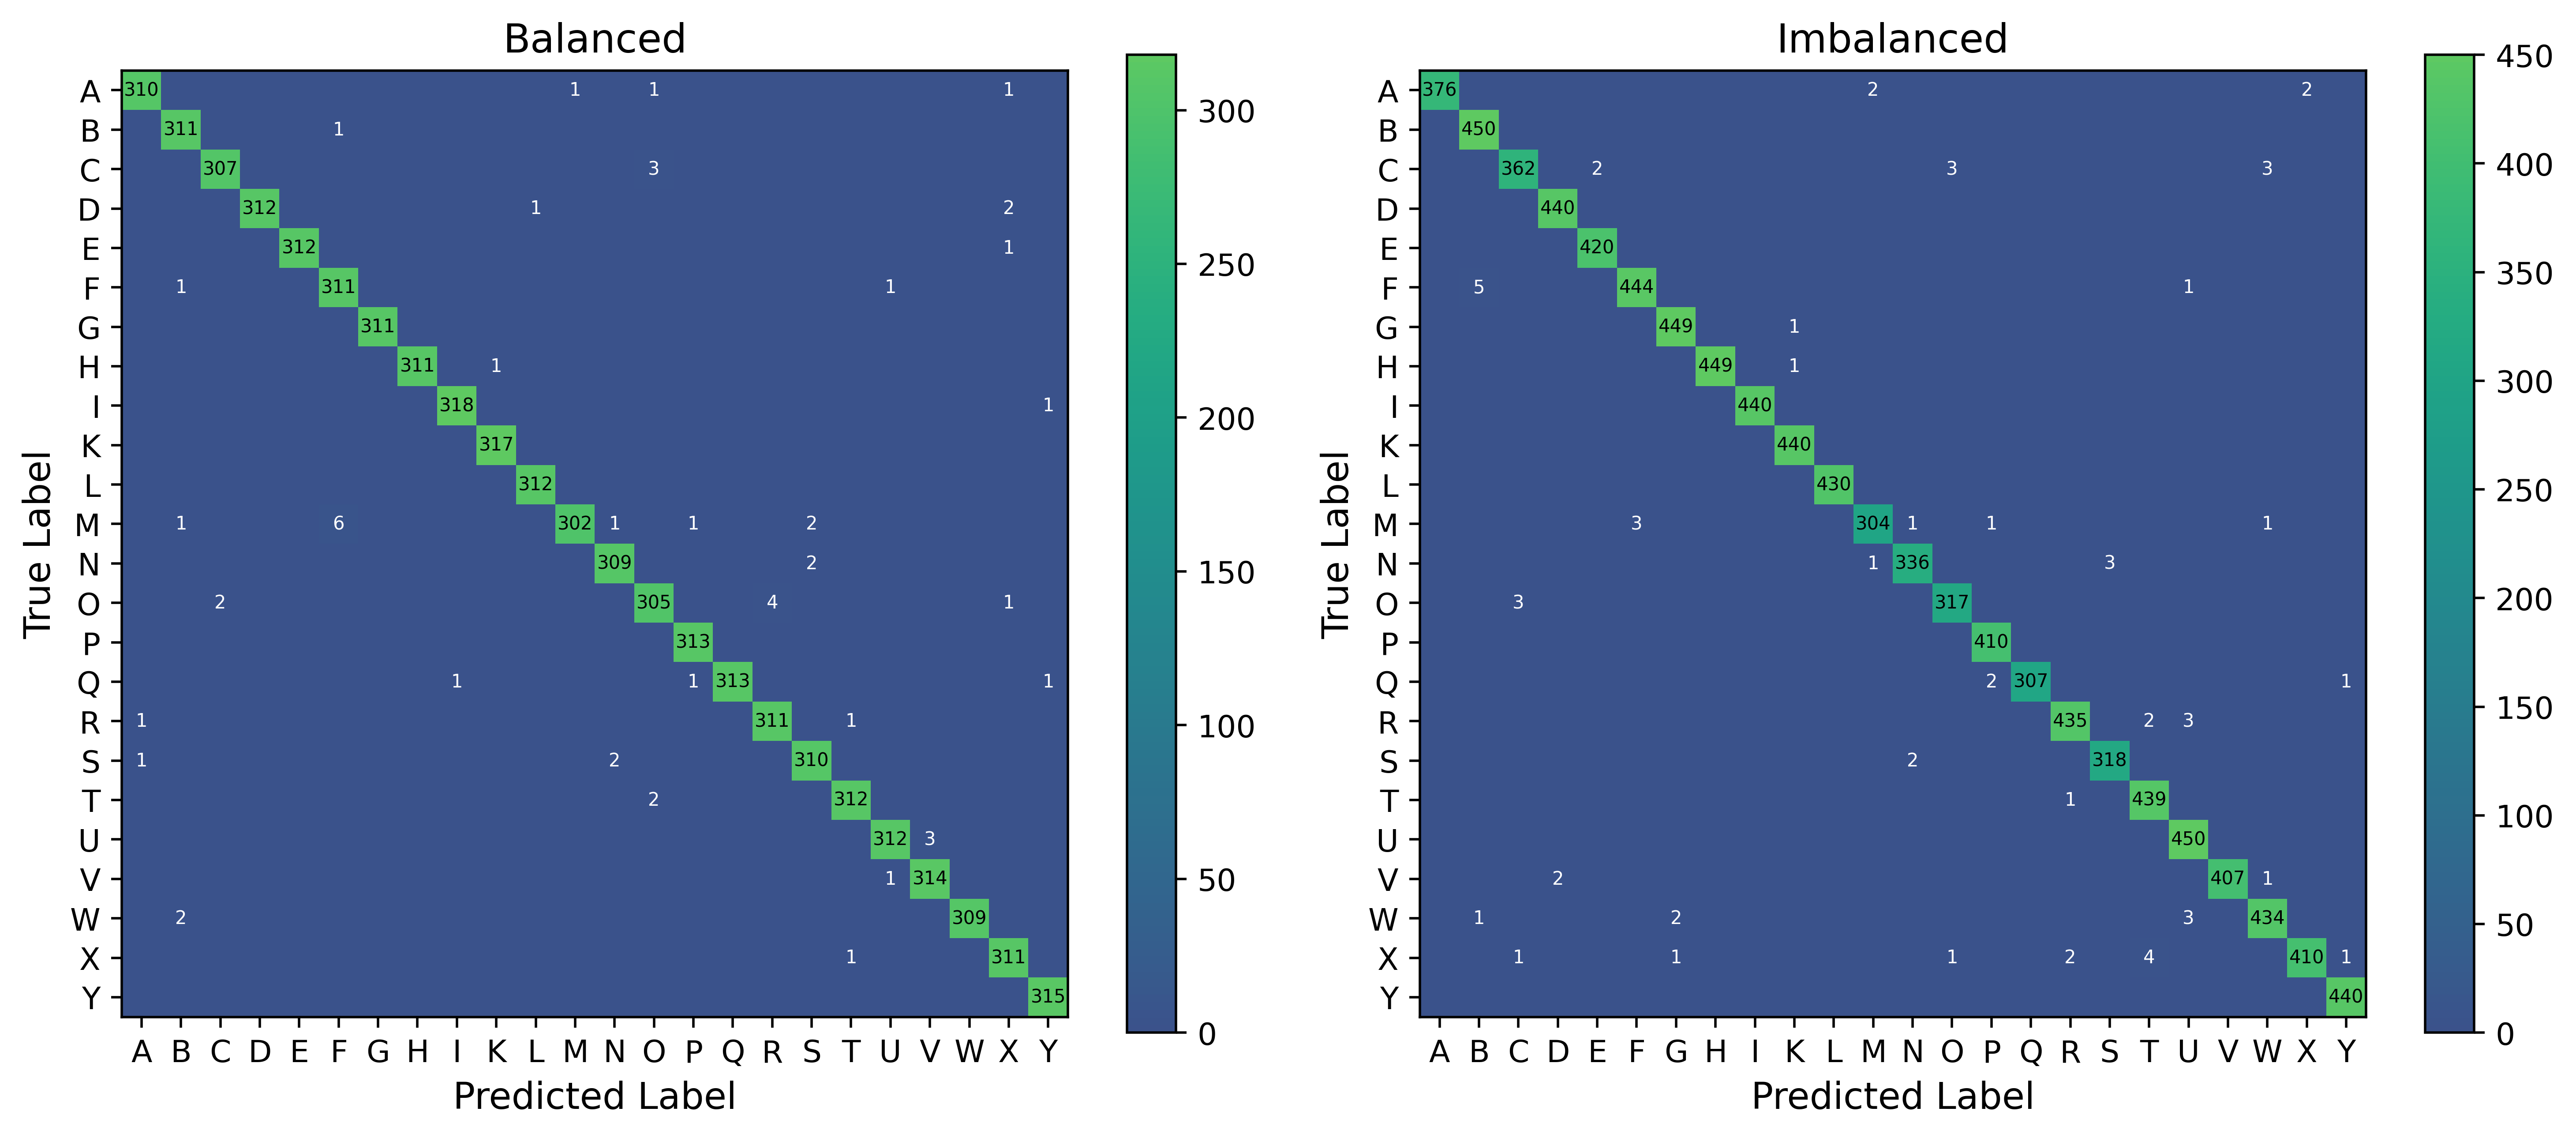

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs = axs.flatten()

plot_confusion_matrix(predicted_labels_balanced, model='phca', n_trials=10, 
                      with_colorbar=True, ax=axs[0], title='Balanced')
plot_confusion_matrix(predicted_labels_imbalanced, model='phca', n_trials=10, 
                      with_colorbar=True, ax=axs[1], title='Imbalanced')

plt.tight_layout()
if save_figs:
    plt.savefig("figures/misclassification.png")
plt.show()

In [4]:
# obtain best performing and least performing PHCA models (in terms of accuracy)
from sklearn.metrics import accuracy_score

def get_best_worst(predicted_labels:dict, model:str="phca") -> list:
    """ 
    Returns trial index that corresponds to best and worst
    accuracy obtained by the `model` 
    """
    
    n_trials = 10
    scores = []
    for i in range(n_trials):
        scores.append(accuracy_score(predicted_labels['true_labels'][i],
                                    predicted_labels[model][i]))
    return [np.argmax(scores), np.argmin(scores)], [np.max(scores), np.min(scores)]

##### Images having Misclassifications

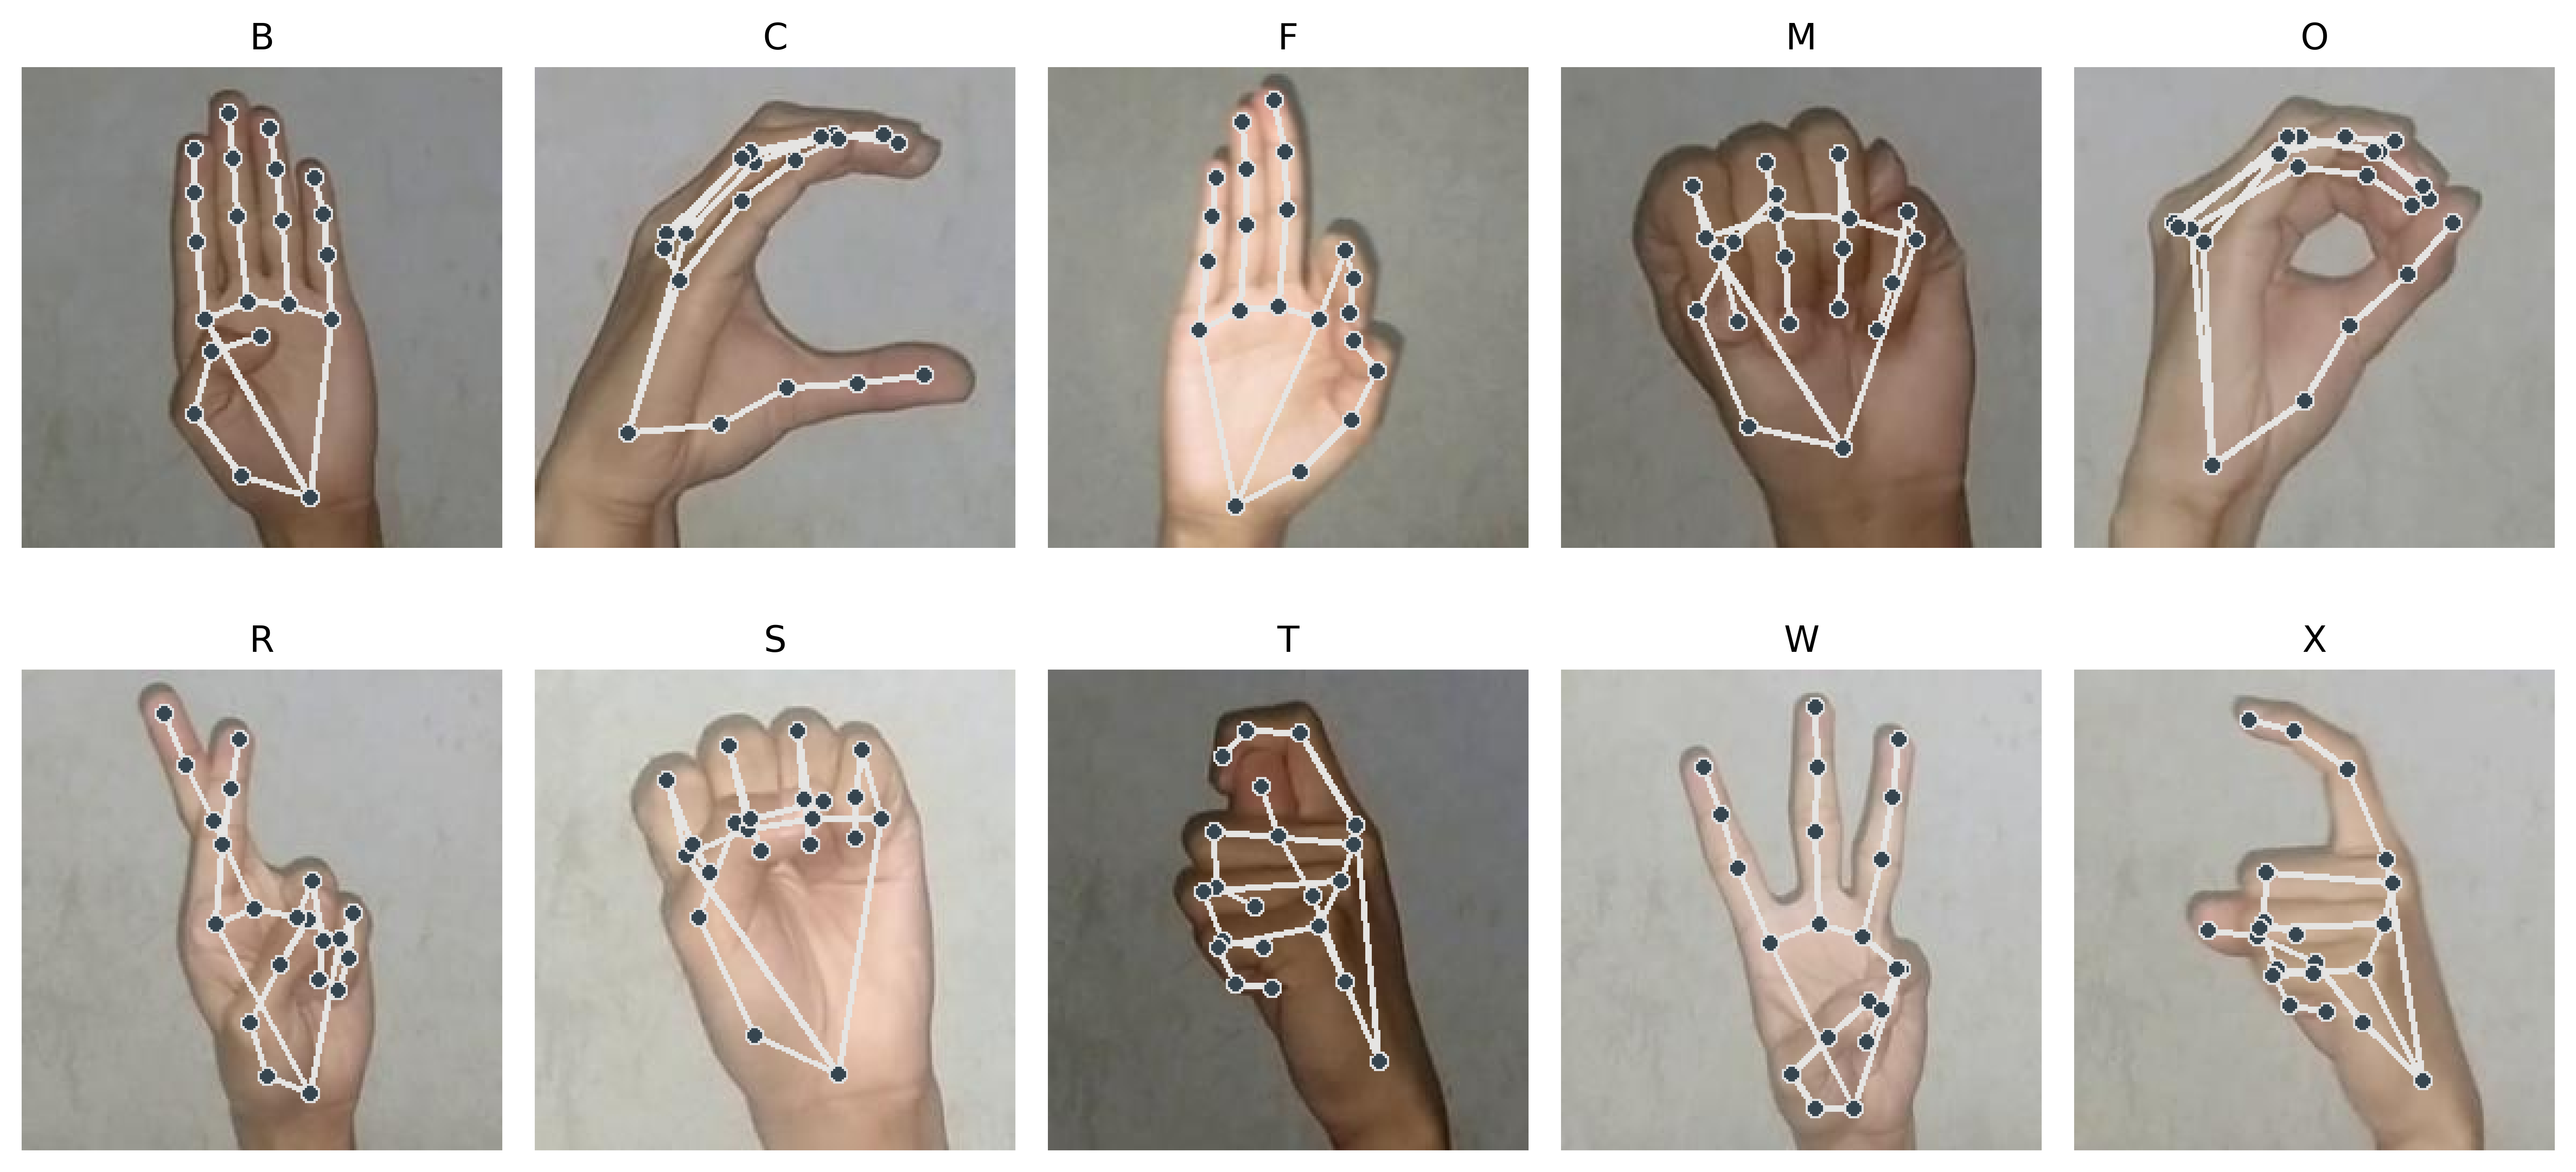

In [4]:
from modules import Image2Landmarks
import matplotlib.pyplot as plt

# plot controls
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['figure.dpi'] = 500
save_figs = True

# misclassified images
letters = ["B", "C", "F", "M", "O", "R", "S", "T", "W", "X"]
img_paths = ['FSL_images/'+letter+'/21.jpg' for letter in letters]

img2landmarks = Image2Landmarks(flatten=True, display_image=True, display_landmarks=False, save_figs=False)

fig, axs = plt.subplots(2, 5, figsize=(12,6))
axs = axs.flatten()
for i in range(len(axs)):
    img2landmarks.display_hand_with_landmarks(image_path=img_paths[i], ax=axs[i], title=letters[i])

plt.tight_layout()
if save_figs:
    plt.savefig('figures/misclassified_images.png')
plt.show()

##### Comparing Persistence Diagrams

In [7]:
from ripser import ripser
import persim
from modules import prepared_data
import numpy as np

FSL_dataset = np.load(f'FSL_alphabet_landmarks_24classes.npy', allow_pickle=True).item()
num_data = len(FSL_dataset['target'])
print(f'{num_data} data points collected. Each datapoint represents the MediaPipe landmarks of the hand.')

# balanced dataset
X_bal, y_bal, paths_bal = prepared_data(FSL_dataset, balanced=True, random_state=21)
print(f"""Balanced dataset prepared.
        total num_instances                 : {X_bal.shape[0]}
        num_instances per class             : {X_bal.shape[0]/24:n}
        num_features                        : {X_bal.shape[1]}""")

# imbalanced dataset
X_imb, y_imb, paths_imb = prepared_data(FSL_dataset, balanced=False)
freqs = np.unique(y_imb, return_counts=True)[1]
print(f"""Imbalanced dataset prepared.
    total num_instances                 : {X_imb.shape[0]}
    minimum num_instances per class     : {min(freqs):n}
    maximum num_instances per class     : {max(freqs):n}
    average num_instances per class     : {np.mean(freqs):0.2f}
    num_features                        : {X_imb.shape[1]} \n""")

10800 data points collected. Each datapoint represents the MediaPipe landmarks of the hand.
Balanced dataset prepared.
        total num_instances                 : 7512
        num_instances per class             : 313
        num_features                        : 63
Imbalanced dataset prepared.
    total num_instances                 : 9767
    minimum num_instances per class     : 313
    maximum num_instances per class     : 450
    average num_instances per class     : 406.96
    num_features                        : 63 



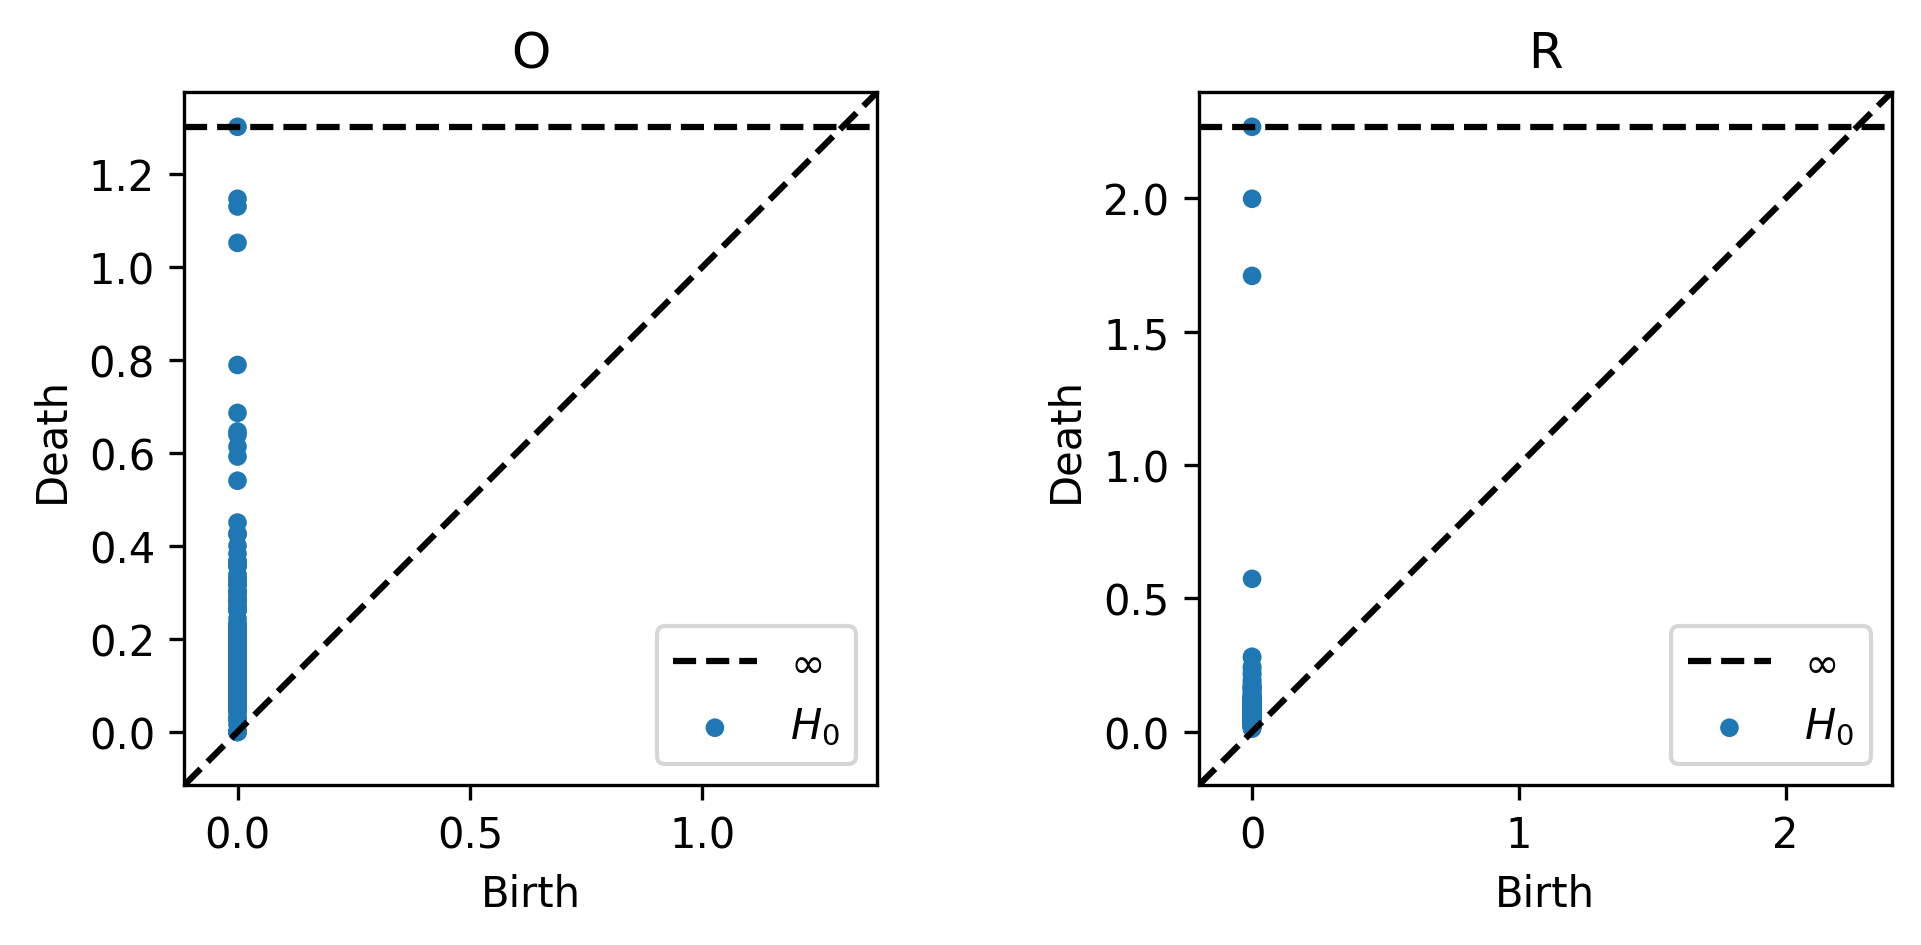

In [10]:
label1 = "O"
label2 = "R"

dgm1 = ripser(X_bal[np.where(y_bal == label1)[0]], maxdim=0)['dgms']
dgm2 = ripser(X_bal[np.where(y_bal == label2)[0]], maxdim=0)['dgms']

plt.figure(figsize=(8,3), dpi=300)

persim.plot_diagrams(dgm1, ax=plt.subplot(121), title=label1)
persim.plot_diagrams(dgm2, ax=plt.subplot(122), title=label2)
plt.show()

In [11]:
persim.bottleneck(dgm1[0], dgm2[0])

0.851942777633667